# Part 2.2 | Transformations

In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

plt.rcParams.update({
    'font.family': 'serif',              # Set the font family
    'font.serif': ['Times New Roman'],   # Use a specific serif font
    'font.size': 16,                     # Set the general font size
    'axes.titlesize': 20,                # Set the font size of the title
    'axes.labelsize': 16,                # Set the font size of axis labels
    'font.style': 'italic',              # Set the font style to italic
    'figure.dpi': 400   
})

category_color_pal = sns.color_palette("hls", 8)#sns.color_palette("husl", 8)
continuous_color_pal = sns.color_palette("rocket_r", as_cmap=True)

## CPI Data

In [3]:
cpi = pd.read_csv('data/CPI_raw.csv')

cpi.Year = cpi.Year.astype(int)
cpi = cpi[cpi.Year >= 1970]
cpi['I'] = cpi['Annual Percent Change (rate of inflation)'].str.replace('%', '').astype(float)/100
cpi['cpi'] = cpi['Annual Average CPI(-U)'].astype(float)

""" 1970's Dollar """

# To find out how much a price in Year 1 would be in Year 2 dollars:
# Year 2 Price = Year 1 Price x (Year 2 CPI/Year 1 CPI)

price_base = 1
values = []
i_base = cpi['cpi'].values[0]
for i in cpi['cpi'].values:
    price = price_base * (i/i_base)
    values.append(price)
cpi['base'] = values

""" Today's Dollar """

# To find out how much a price in Year 1 would be in Year 2 dollars:
# Year 2 Price = Year 1 Price x (Year 2 CPI/Year 1 CPI)

price_base = 1
values = []
i_base = cpi['cpi'].values[-1]
for i in cpi['cpi'].values:
    price = price_base * (i/i_base)
    values.append(price)
cpi['today'] = values

cpi.to_csv('data/CPI.csv')

In [43]:
data = pd.read_csv('data/Daily_Coffee_Prices.csv', index_col=0)
data['date_column'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['year'] = data['date_column'].dt.year
data = data[(data['year'] < 2023)]

cpi = pd.read_csv('data/CPI.csv')

today_list = []
cpi_list = []
for i,row in data.iterrows():
    cpi_year = cpi[cpi.Year == row.year]
    year = row.year
    today_list.append(cpi_year.today.iloc[0])
    cpi_list.append(cpi_year.cpi.iloc[0])
    
data['today'] = today_list
data['cpi'] = cpi_list
data.to_csv('data/Coffee_Prices_CPI.csv')

In [6]:
data = pd.read_csv('data/Coffee_Prices.csv')
data = data.rename(columns={' value': 'price'})

data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['date'] = data['date'].dt.to_period('M')

monthly_avg = data.groupby('date')['price'].mean().reset_index()

monthly_avg.to_csv('data/Monthly_Coffee_Prices.csv')

In [7]:
data = pd.read_csv('data/Coffee_Prices.csv')
data = data.rename(columns={' value': 'price'})

data.to_csv('data/Daily_Coffee_Prices.csv')

## CPI Figures

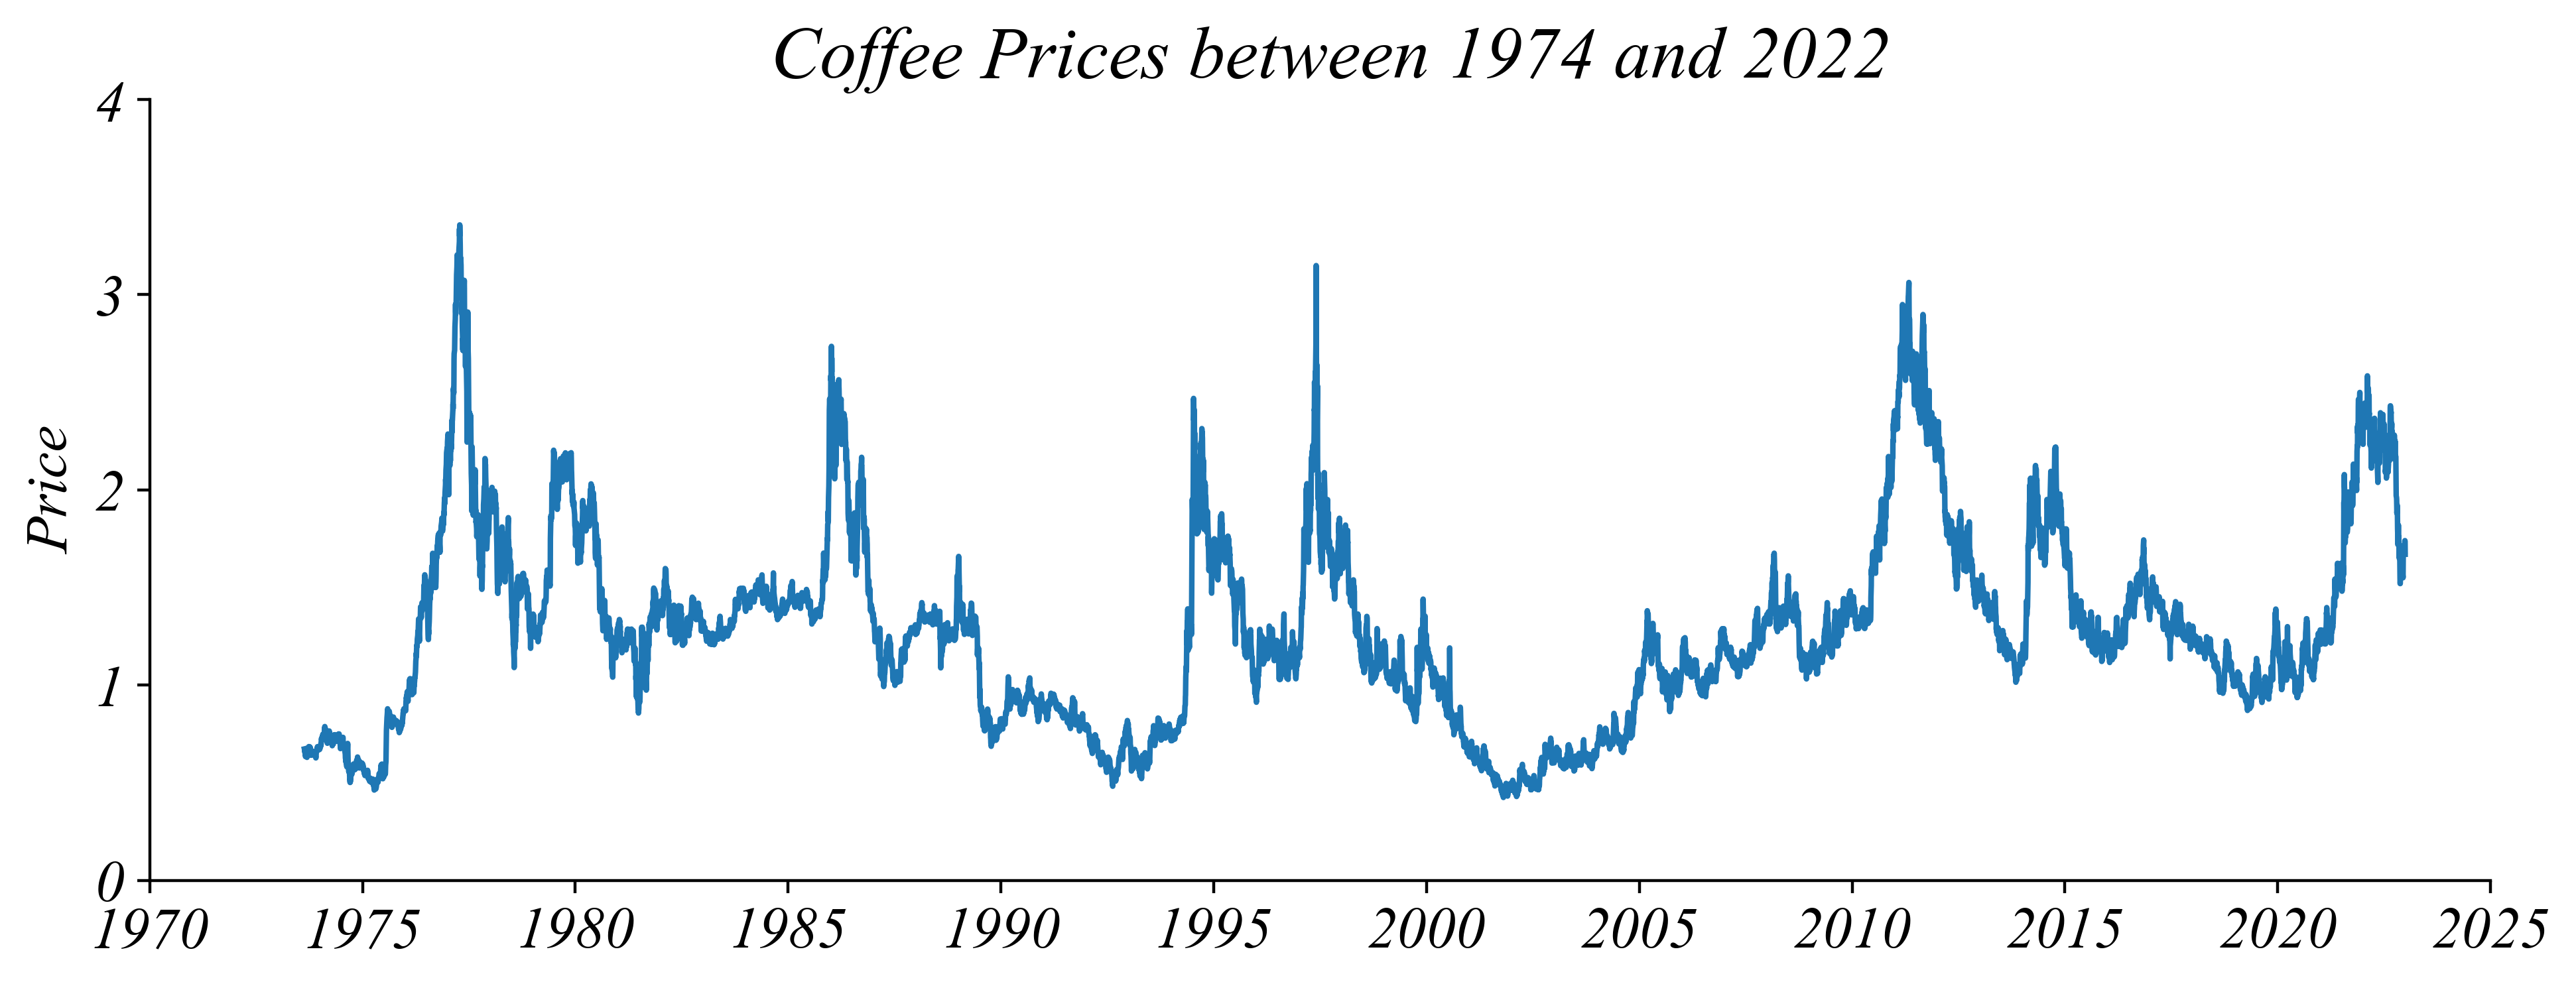

In [76]:
import matplotlib.dates as mdates

# Load Dataset
data = pd.read_csv('data/Daily_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data = data[(data['date'].dt.year < 2023)]

# Figure
plt.figure(figsize=(10, 4))
sns.lineplot(data, x='date', y='price')

# Styling
plt.title('Coffee Prices between 1974 and 2022')
plt.xlabel('')
plt.ylabel('Price')
plt.yticks(np.arange(0,4+1,1))

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
years_to_show = range(1970,2030,5)
tick_dates = pd.to_datetime([f'{year}-01-01' for year in years_to_show])
ax.set_xticks(tick_dates)
ax.set_xticklabels(years_to_show)  # Just show the year number

sns.despine(trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_cpi_01.png')

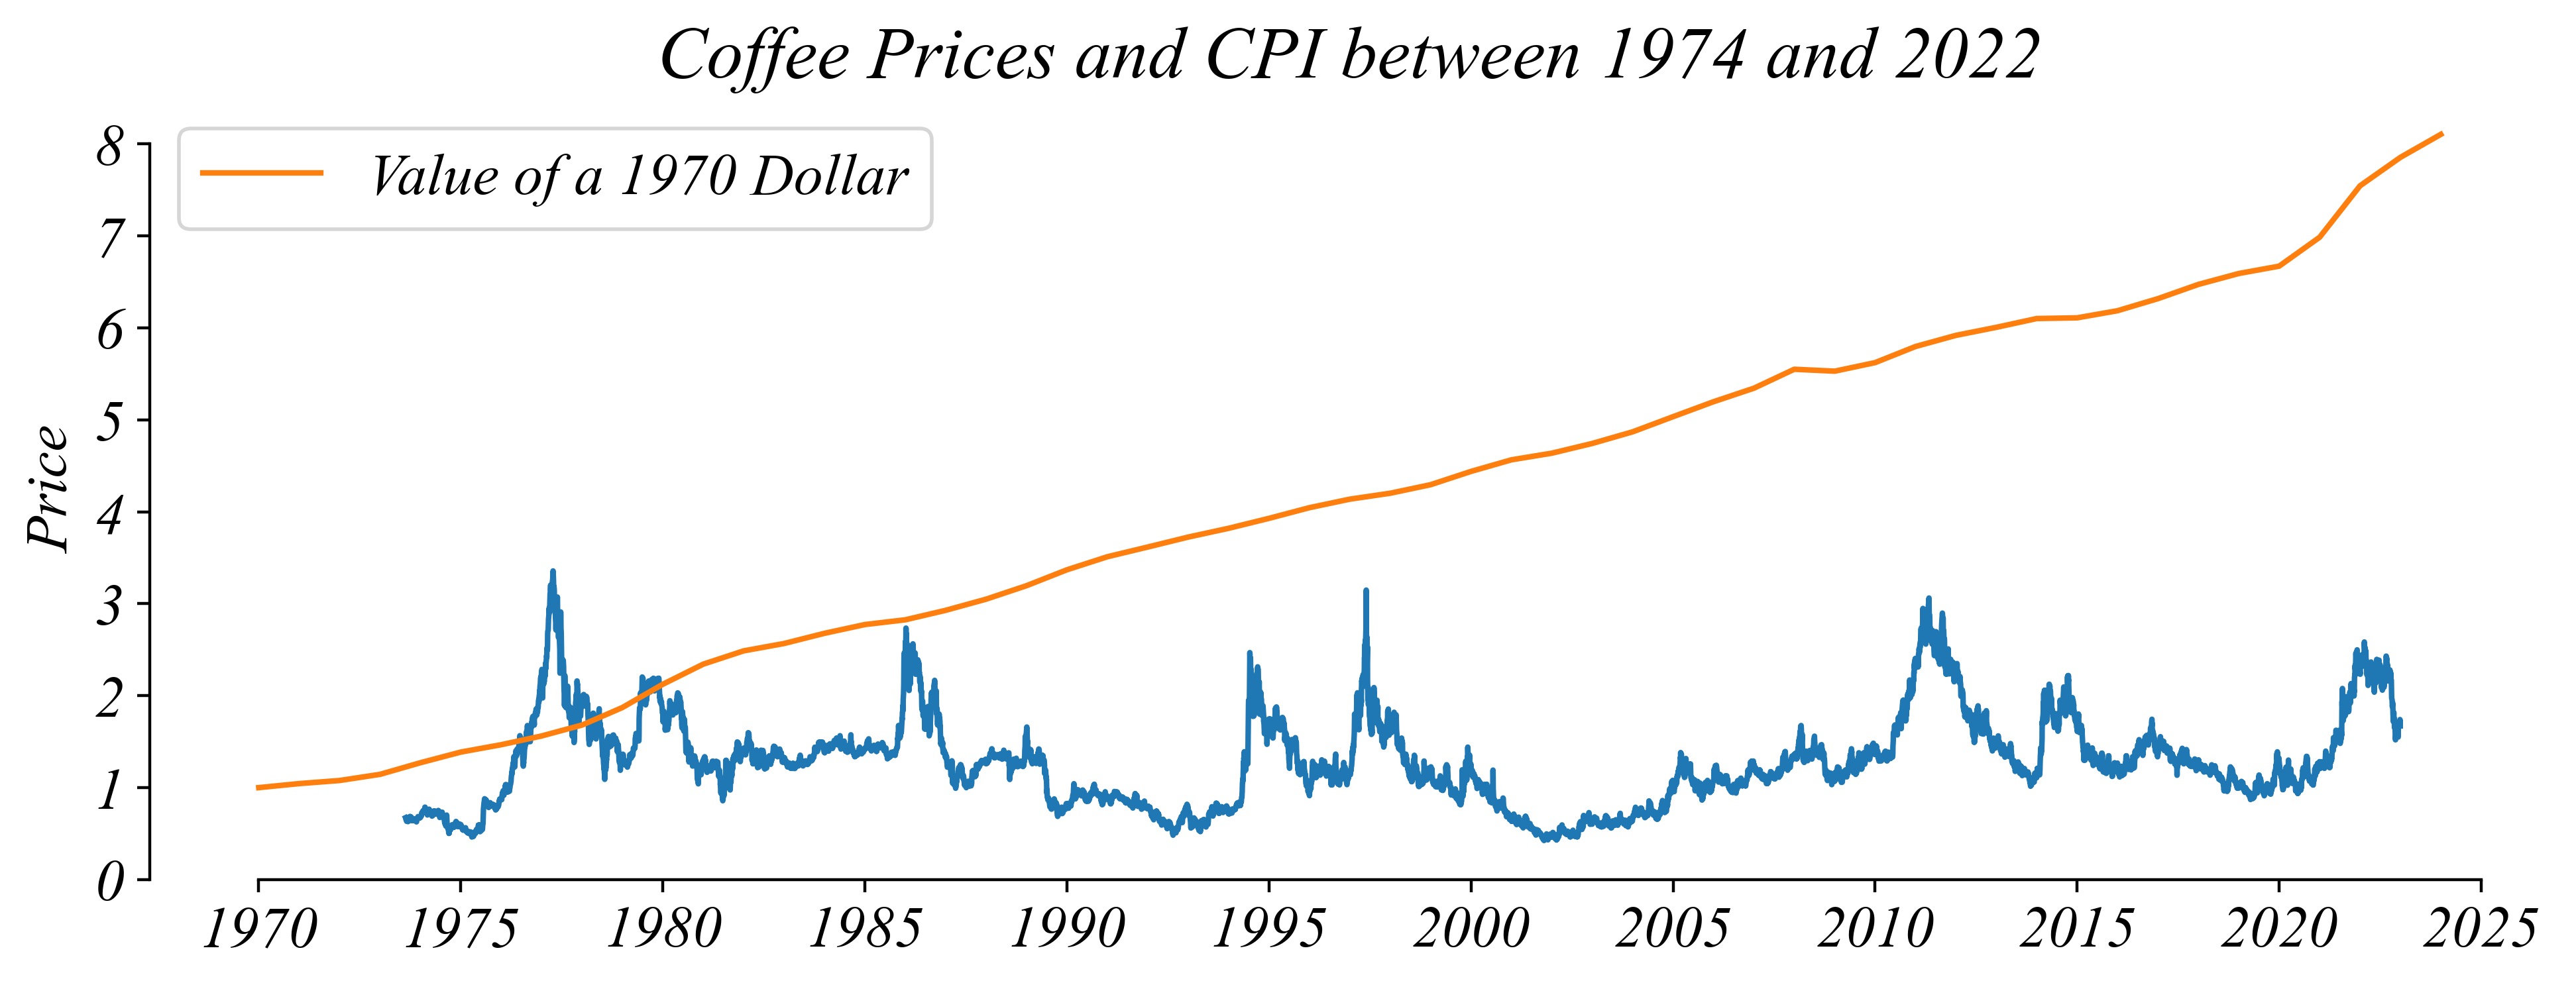

In [6]:
import matplotlib.dates as mdates

# Load Dataset
data = pd.read_csv('data/Daily_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data = data[(data['date'].dt.year < 2023)]

cpi = pd.read_csv('data/CPI.csv')
cpi['date'] = pd.to_datetime(cpi['Year'], format='%Y')

# Figure
plt.figure(figsize=(10, 4))
sns.lineplot(data, x='date', y='price')
sns.lineplot(cpi, x='date', y='base', label='Value of a 1970 Dollar')

# Styling
plt.title('Coffee Prices and CPI between 1974 and 2022')
plt.xlabel('')
plt.ylabel('Price')
plt.yticks(np.arange(0,8+1,1))

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
years_to_show = range(1970,2030,5)
tick_dates = pd.to_datetime([f'{year}-01-01' for year in years_to_show])
ax.set_xticks(tick_dates)
ax.set_xticklabels(years_to_show)  # Just show the year number

sns.despine(trim=True)
plt.tight_layout()
plt.legend()

# Save Figure
plt.savefig('i/i_cpi_02.png')

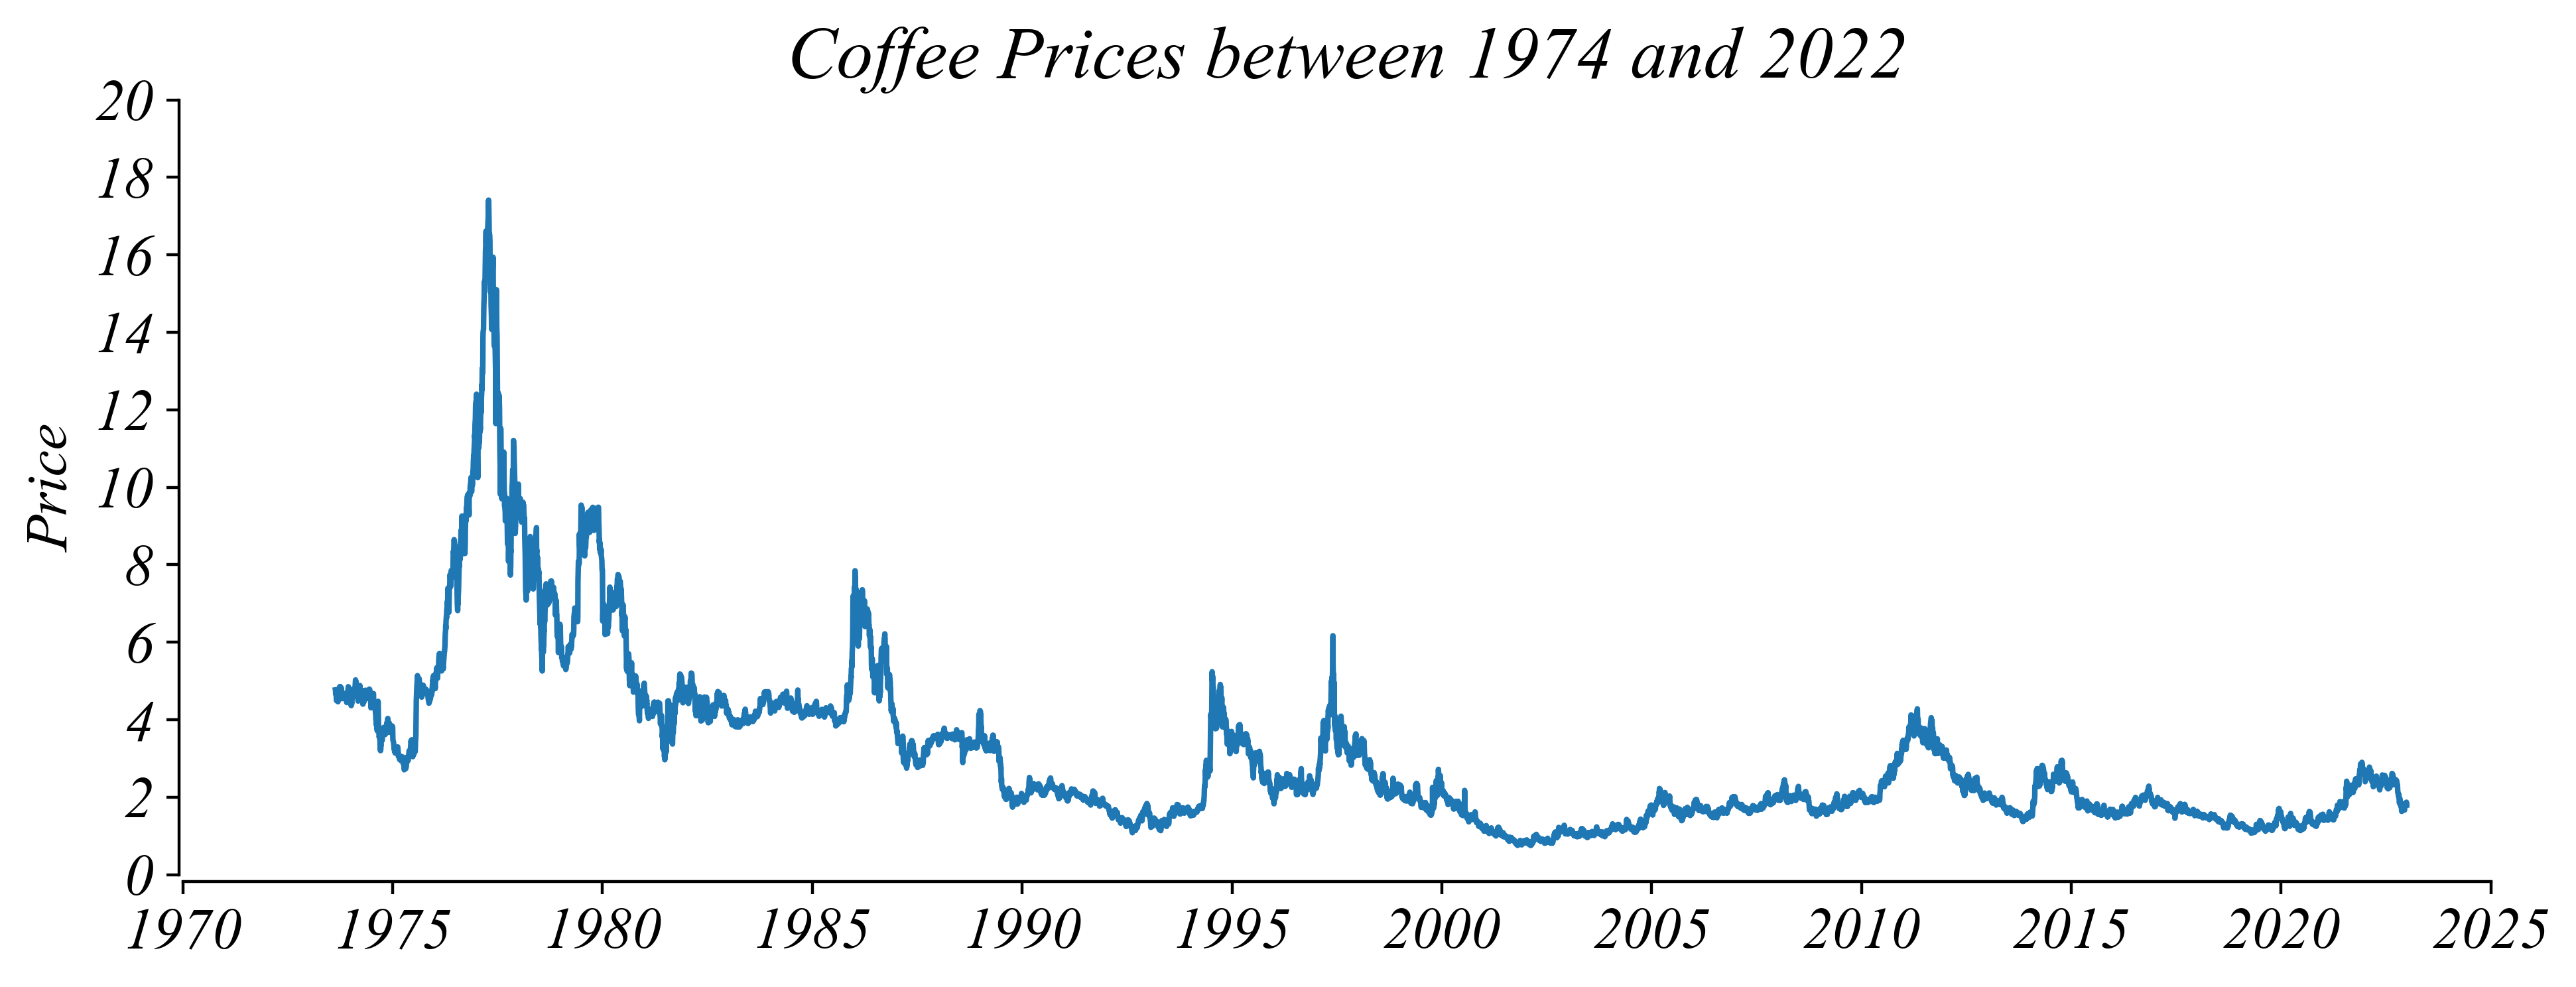

In [16]:
import matplotlib.dates as mdates

# Load Dataset
data = pd.read_csv('data/Coffee_Prices_CPI.csv')
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['adjusted_price'] = data['price'] / data['today']

# Figure
plt.figure(figsize=(10, 4))
sns.lineplot(data, x='date', y='adjusted_price')

# Styling
plt.title('Coffee Prices between 1974 and 2022')
plt.xlabel('')
plt.ylabel('Price')
plt.yticks(np.arange(0,20+1,2))

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
years_to_show = range(1970,2030,5)
tick_dates = pd.to_datetime([f'{year}-01-01' for year in years_to_show])
ax.set_xticks(tick_dates)
ax.set_xticklabels(years_to_show)

sns.despine(trim=True, offset=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_cpi_03.png')

## Global Open Hours

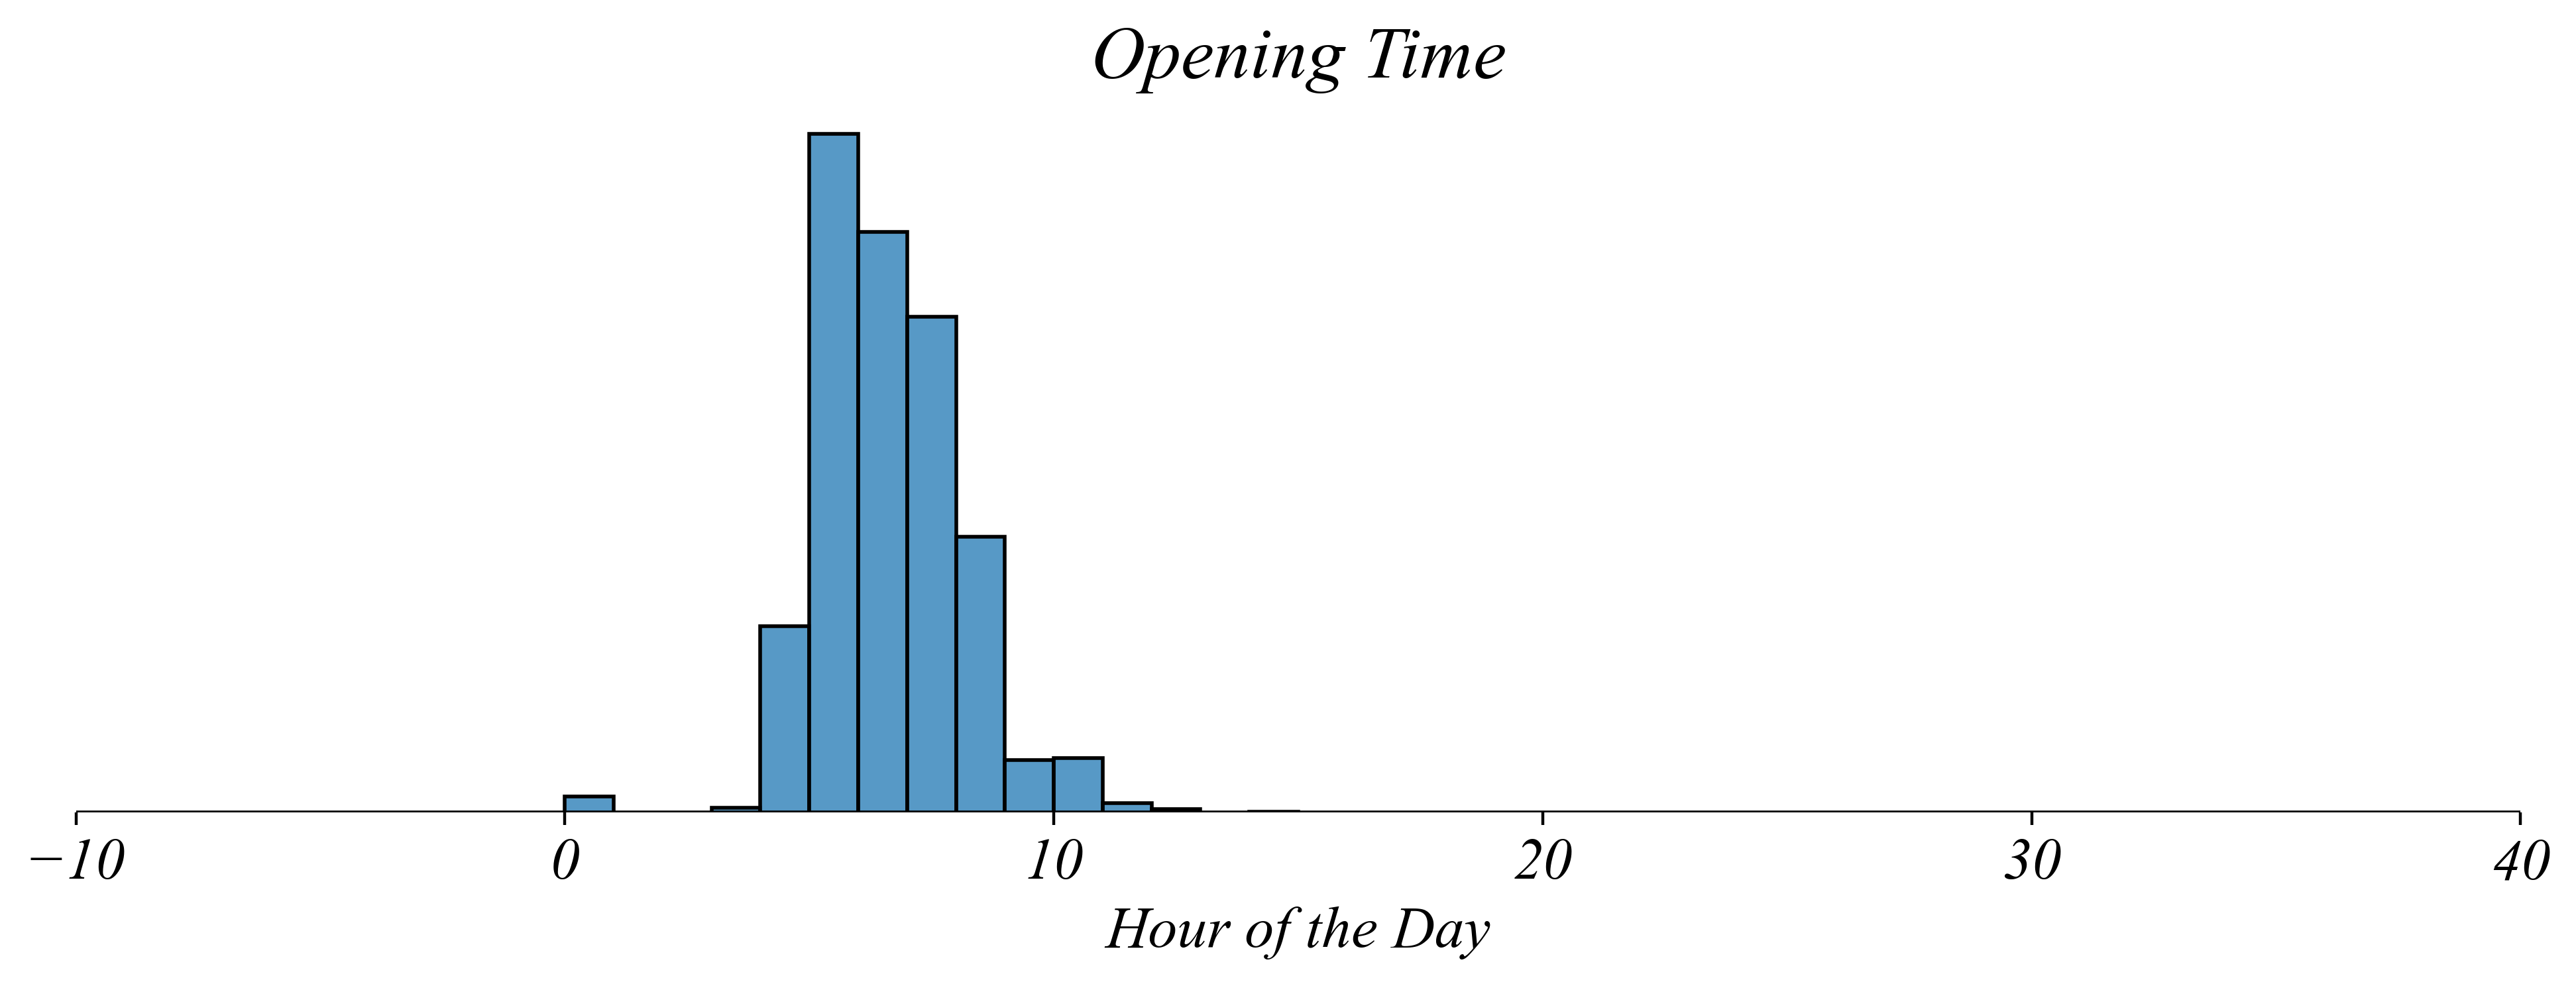

In [73]:
# Load Dataste
hours = pd.read_csv('data/Starbucks_Location_Hours.csv', index_col=0)

# Figure
plt.figure(figsize=(10, 4))
sns.histplot(data=hours, x='open', bins=range(-10, 41, 1), edgecolor='black')

# Styling
plt.xlabel('Hour of the Day')
plt.xlim(-10,40)
plt.ylabel('')
plt.yticks([])
plt.title('Opening Time')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_01.png')

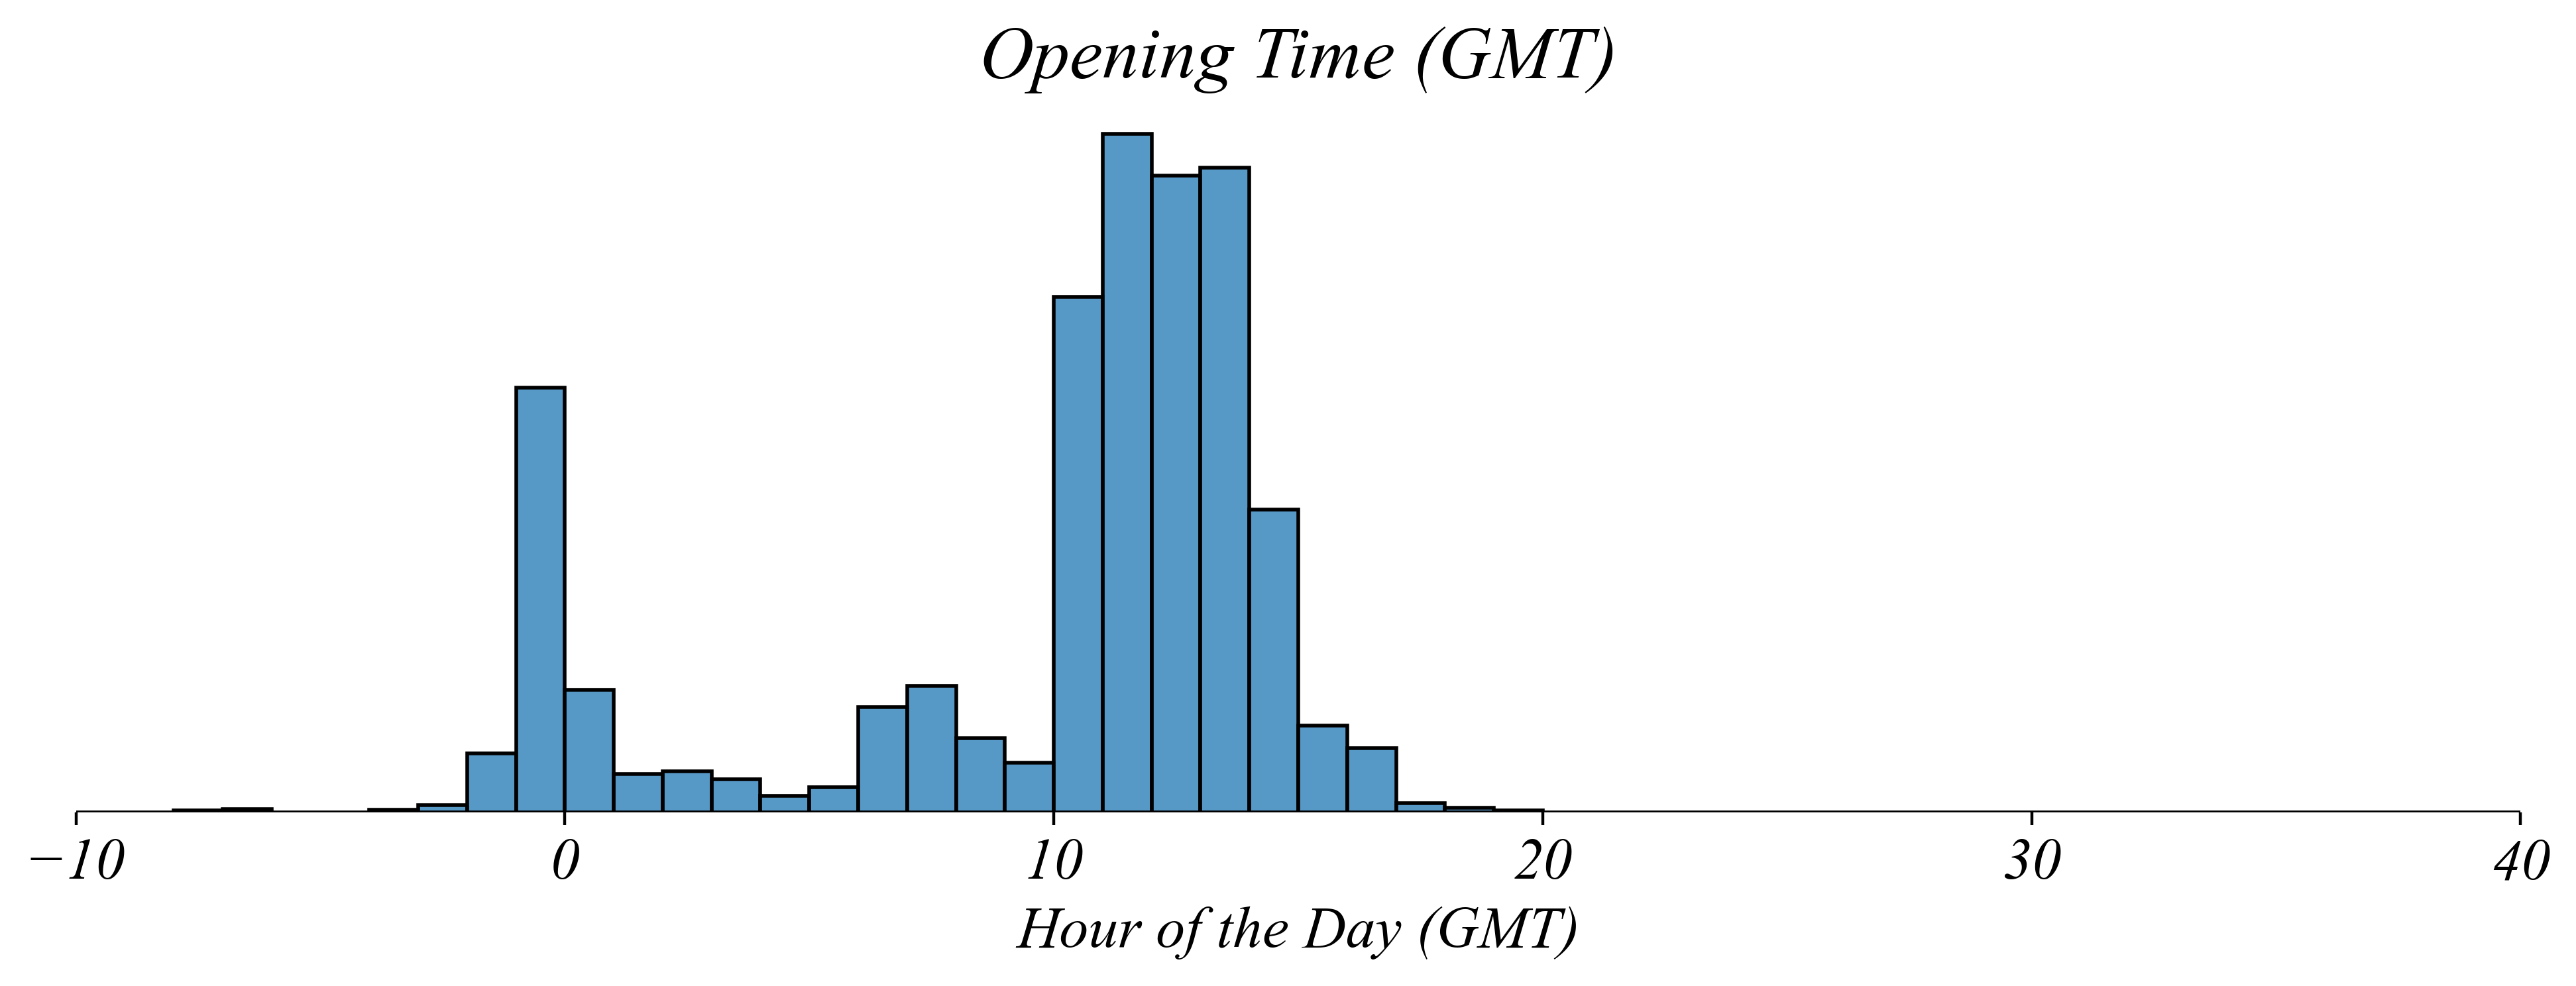

In [72]:
# Load Dataset
hours = pd.read_csv('data/Starbucks_Location_Hours.csv', index_col=0)
hours['open_GMT'] = hours['open'] - hours['timezone']

# Figure
plt.figure(figsize=(10, 4))
sns.histplot(data=hours, x='open_GMT', bins=range(-10, 41, 1), edgecolor='black')

# Styling
plt.xlabel('Hour of the Day (GMT)')
plt.xlim(-10,40)
plt.ylabel('')
plt.yticks([])
plt.title('Opening Time (GMT)')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_02.png')

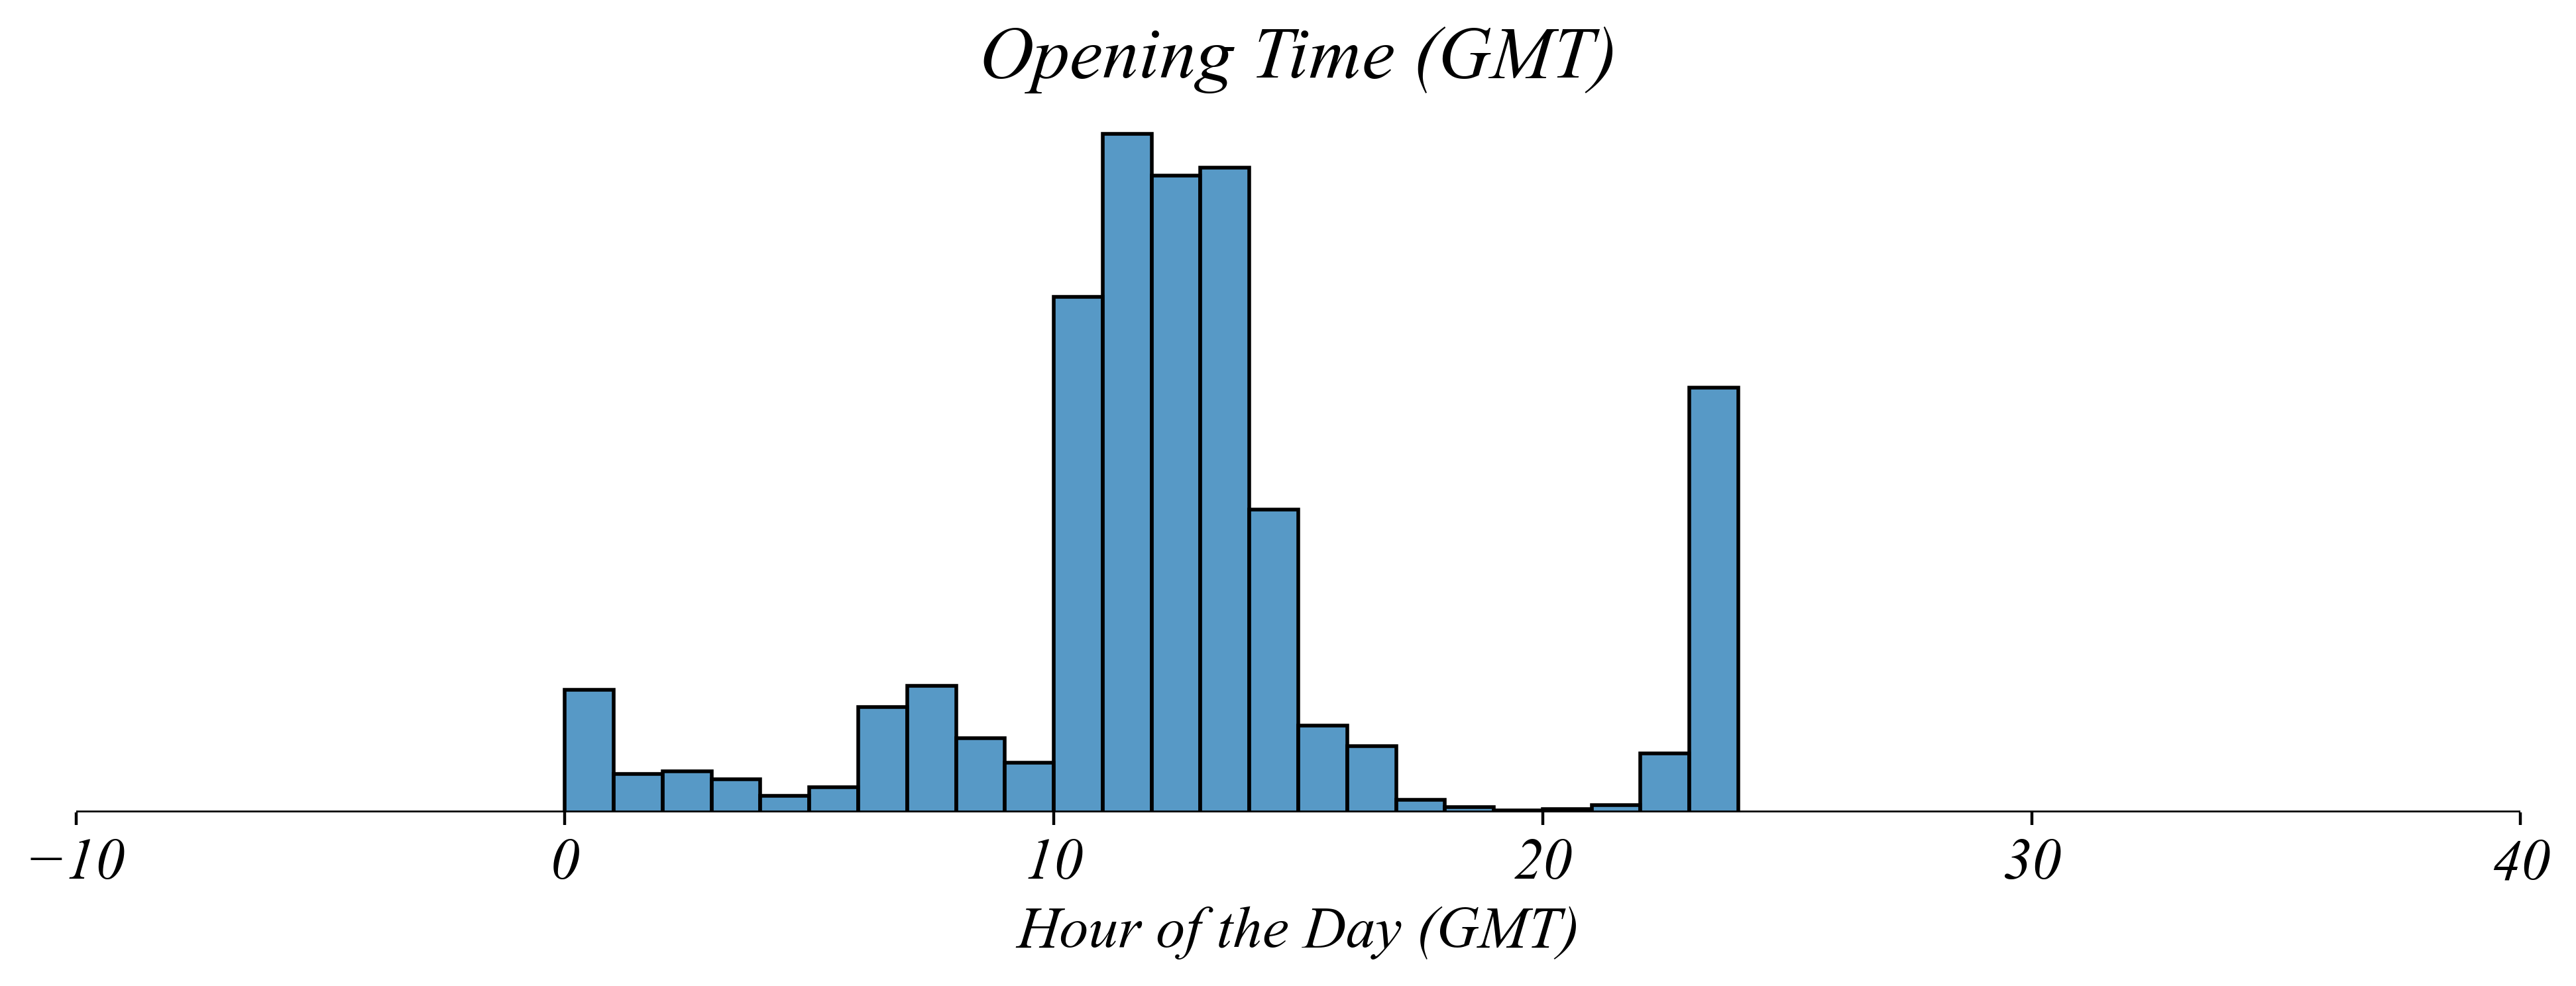

In [71]:
# Load Dataset
hours = pd.read_csv('data/Starbucks_Location_Hours.csv', index_col=0)
hours['open_GMT'] = hours['open'] - hours['timezone']

hours['open_GMT_norm'] = hours['open_GMT'].mod(24)

# Figure
plt.figure(figsize=(10, 4))
sns.histplot(data=hours, x='open_GMT_norm', bins=range(-10, 41, 1), edgecolor='black')

# Styling
plt.xlabel('Hour of the Day (GMT)')
plt.xlim(-10,40)
plt.ylabel('')
plt.yticks([])
plt.title('Opening Time (GMT)')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_03.png')

## Log Transformations

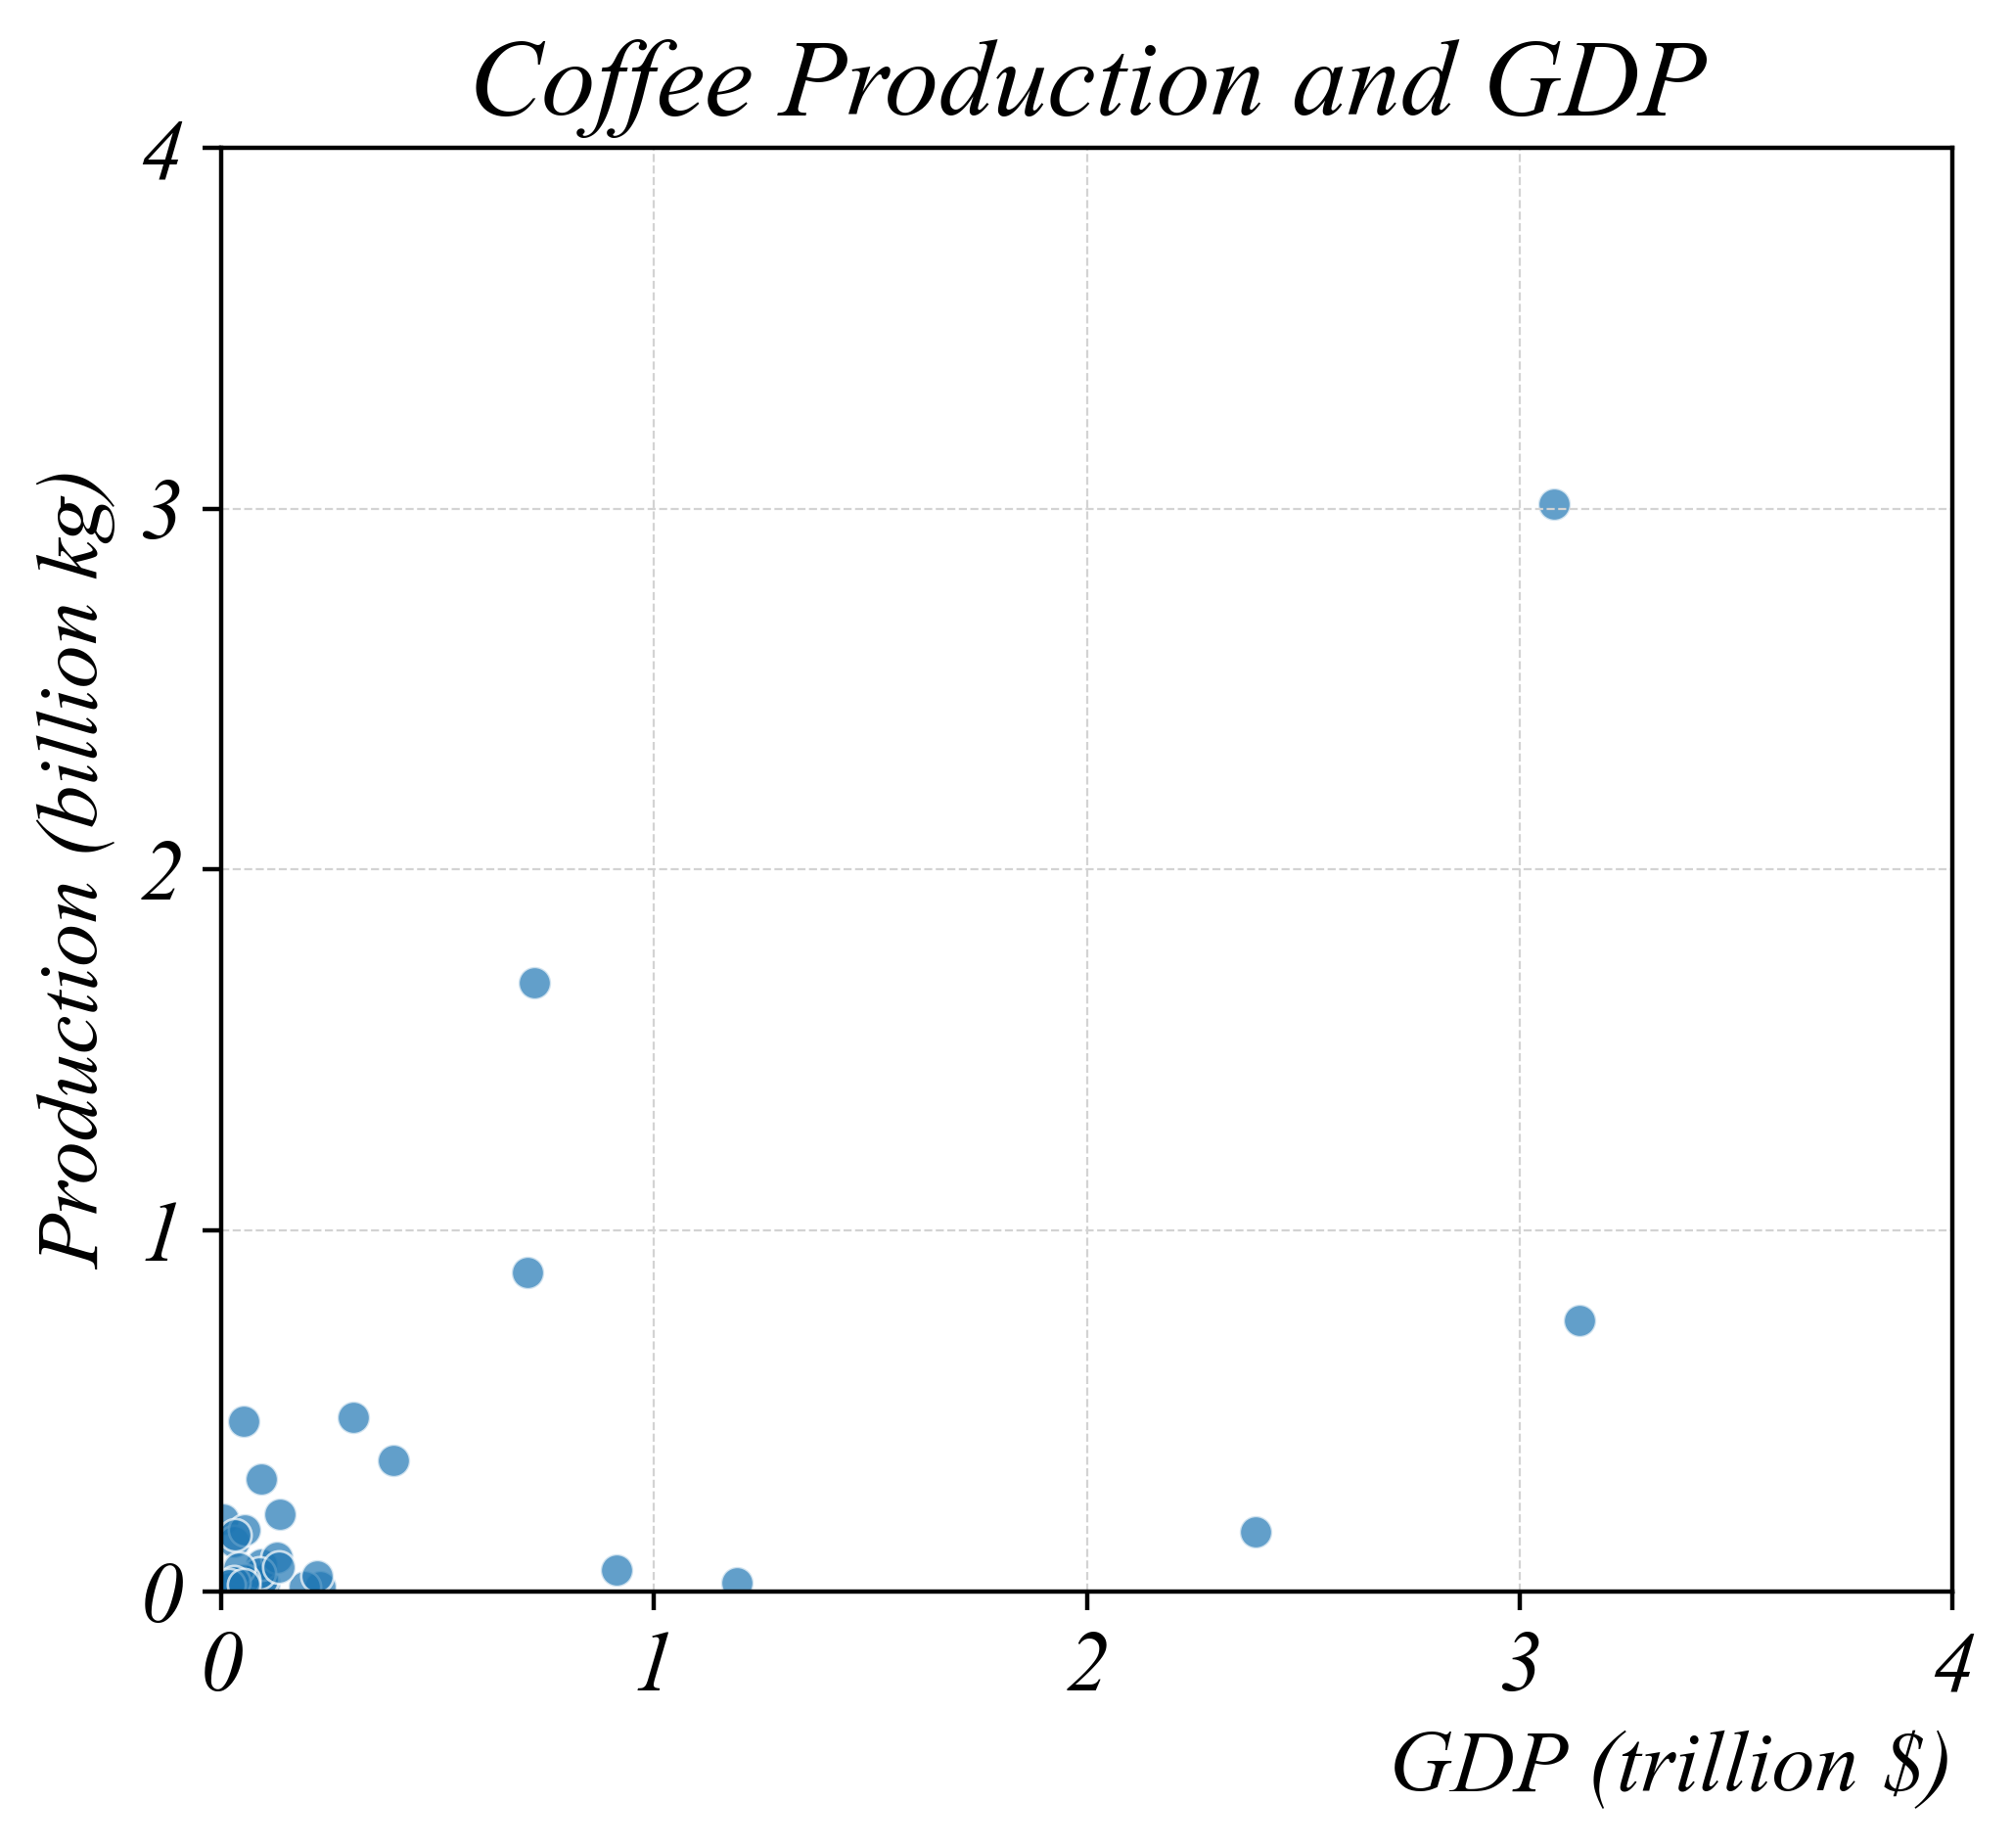

In [6]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(data, x='GDP', y='coffe_prod', alpha=0.7)

# Styling
plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks(ticks)
plt.xlim(0,4)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_04.png')

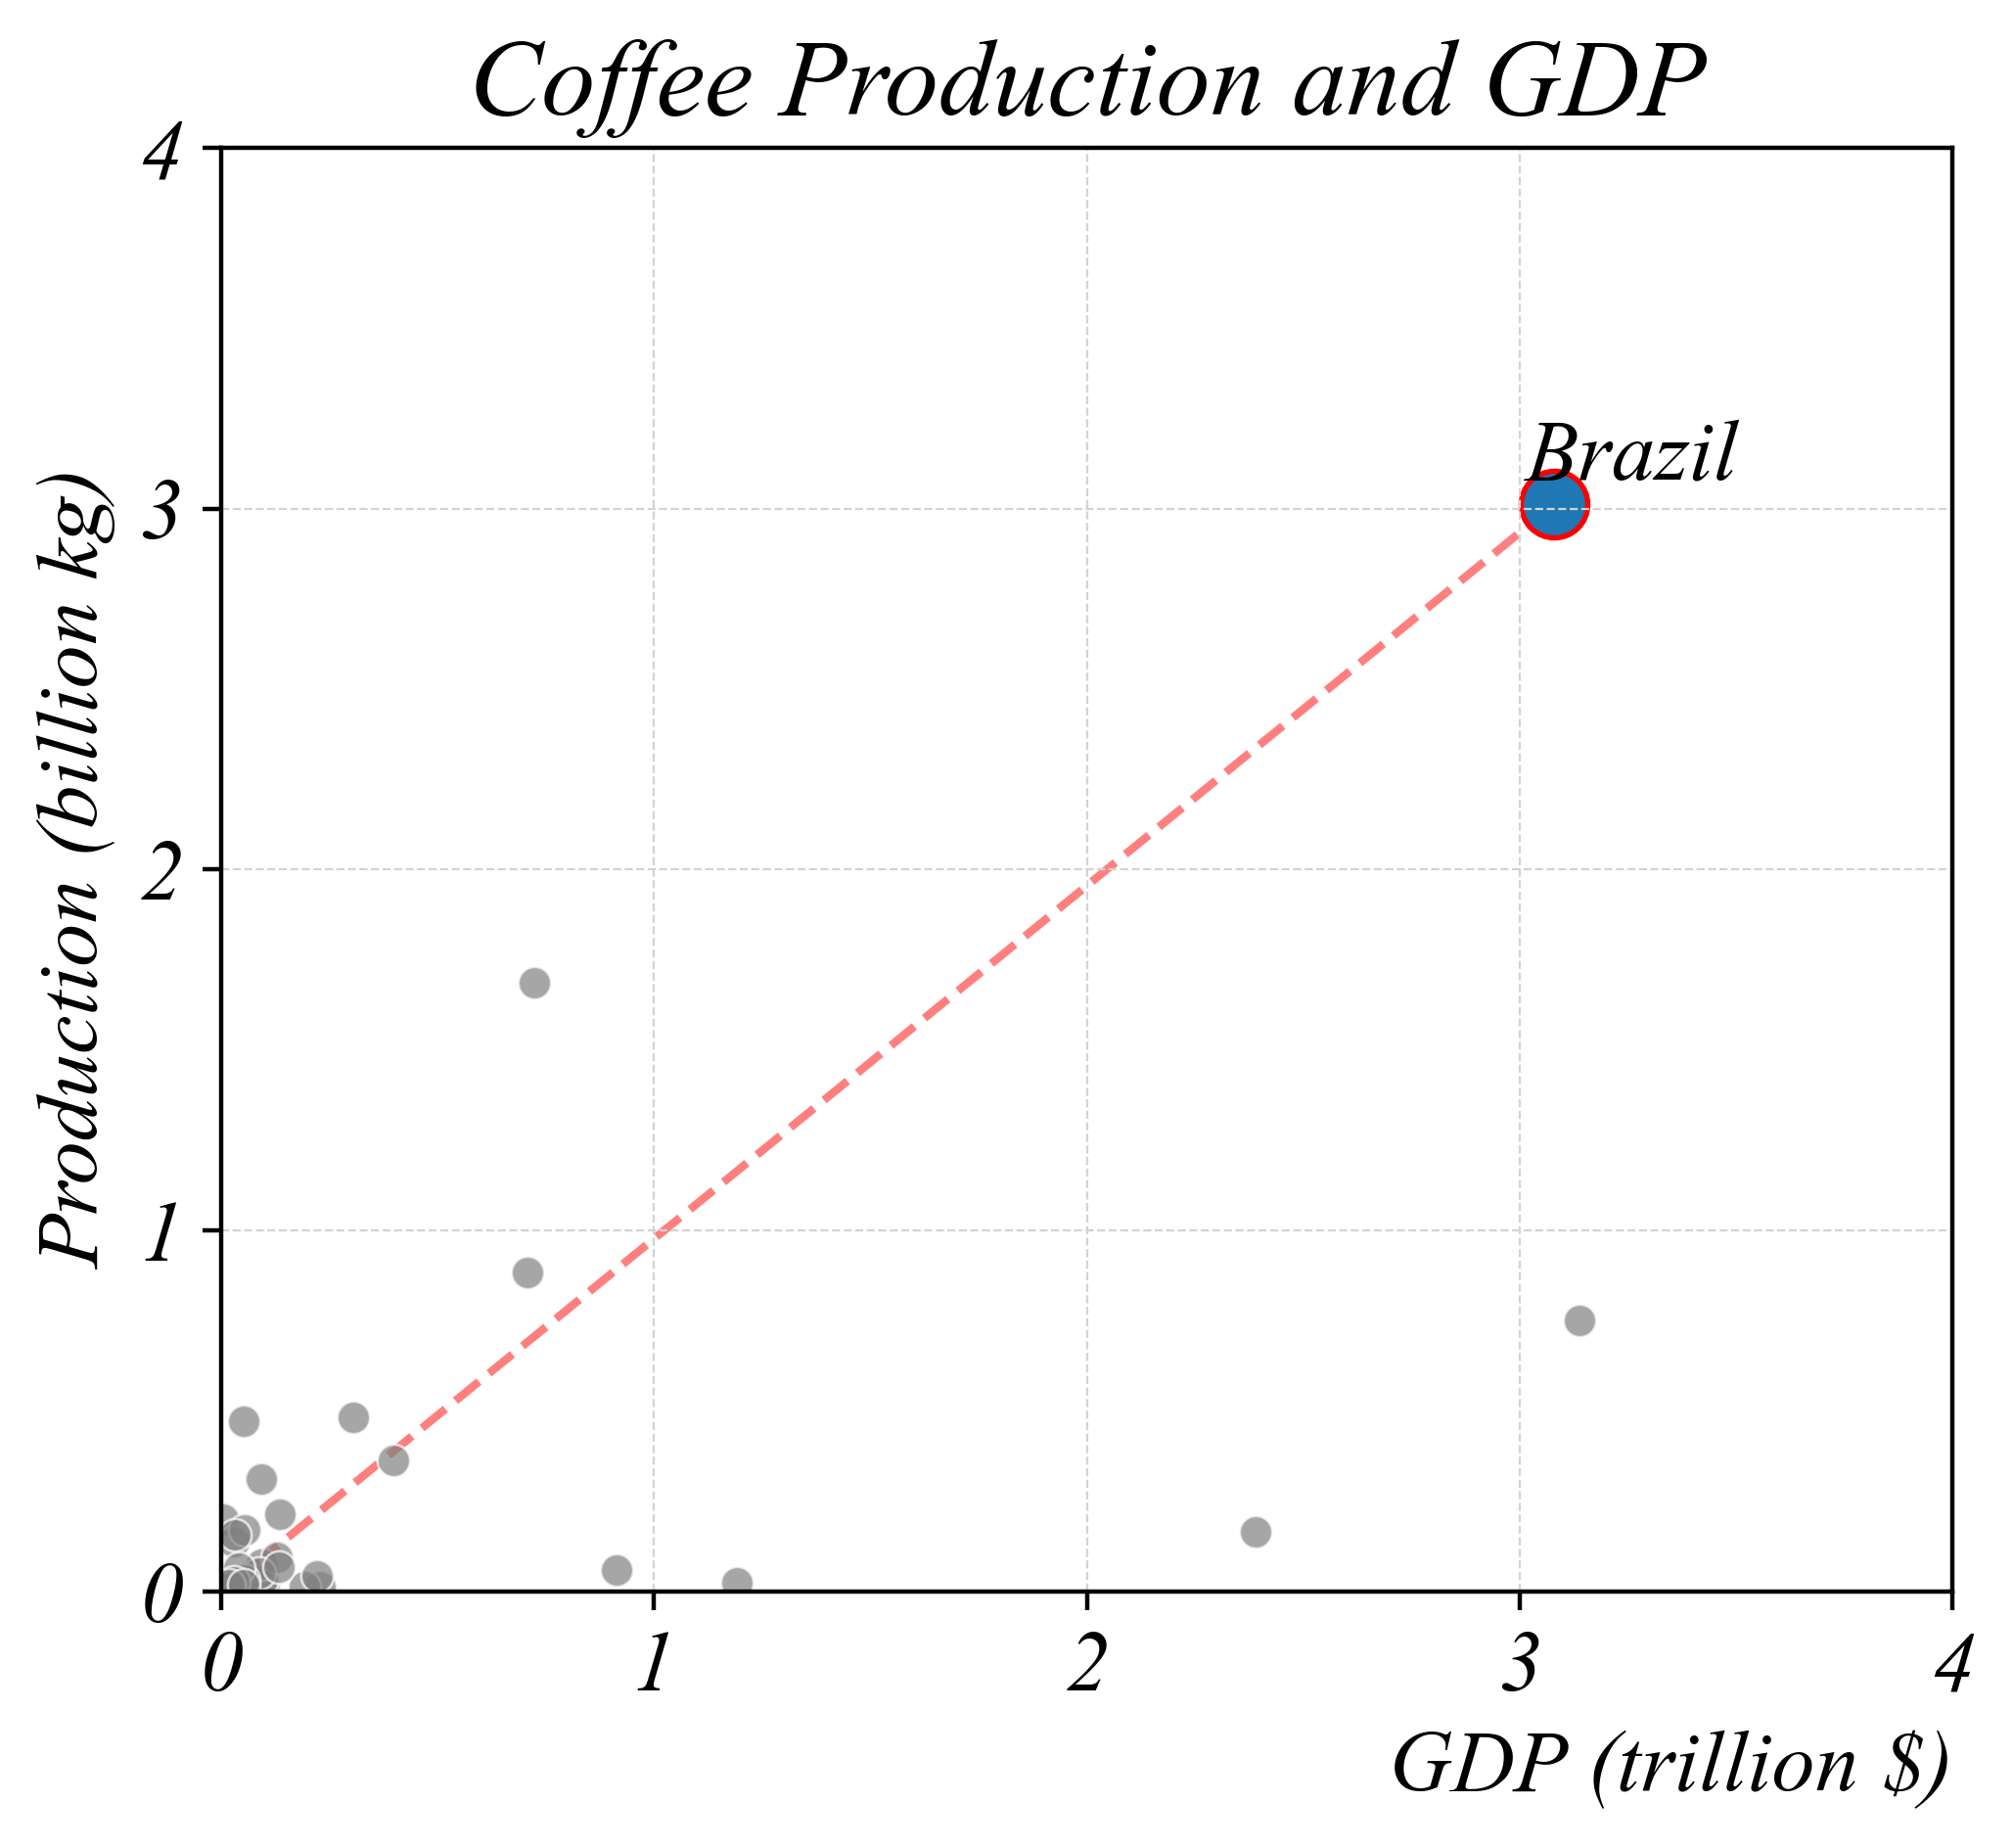

In [7]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
brazil = data[data.coffe_prod == data.coffe_prod.max()]

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(data, x='GDP', y='coffe_prod', color='grey', alpha=0.7)
sns.scatterplot(brazil, x='GDP', y='coffe_prod', edgecolors='red', alpha=1, s=150)

# Annotation
plt.annotate('Brazil',(brazil.coffe_prod.values[0], brazil.GDP.values[0]))
plt.plot([0,brazil.GDP.values[0]],[0,brazil.coffe_prod.values[0]], linestyle='--', color='red', zorder=-1, alpha=0.5)

# Styling
plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks(ticks)
plt.xlim(0,4)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_05.png')

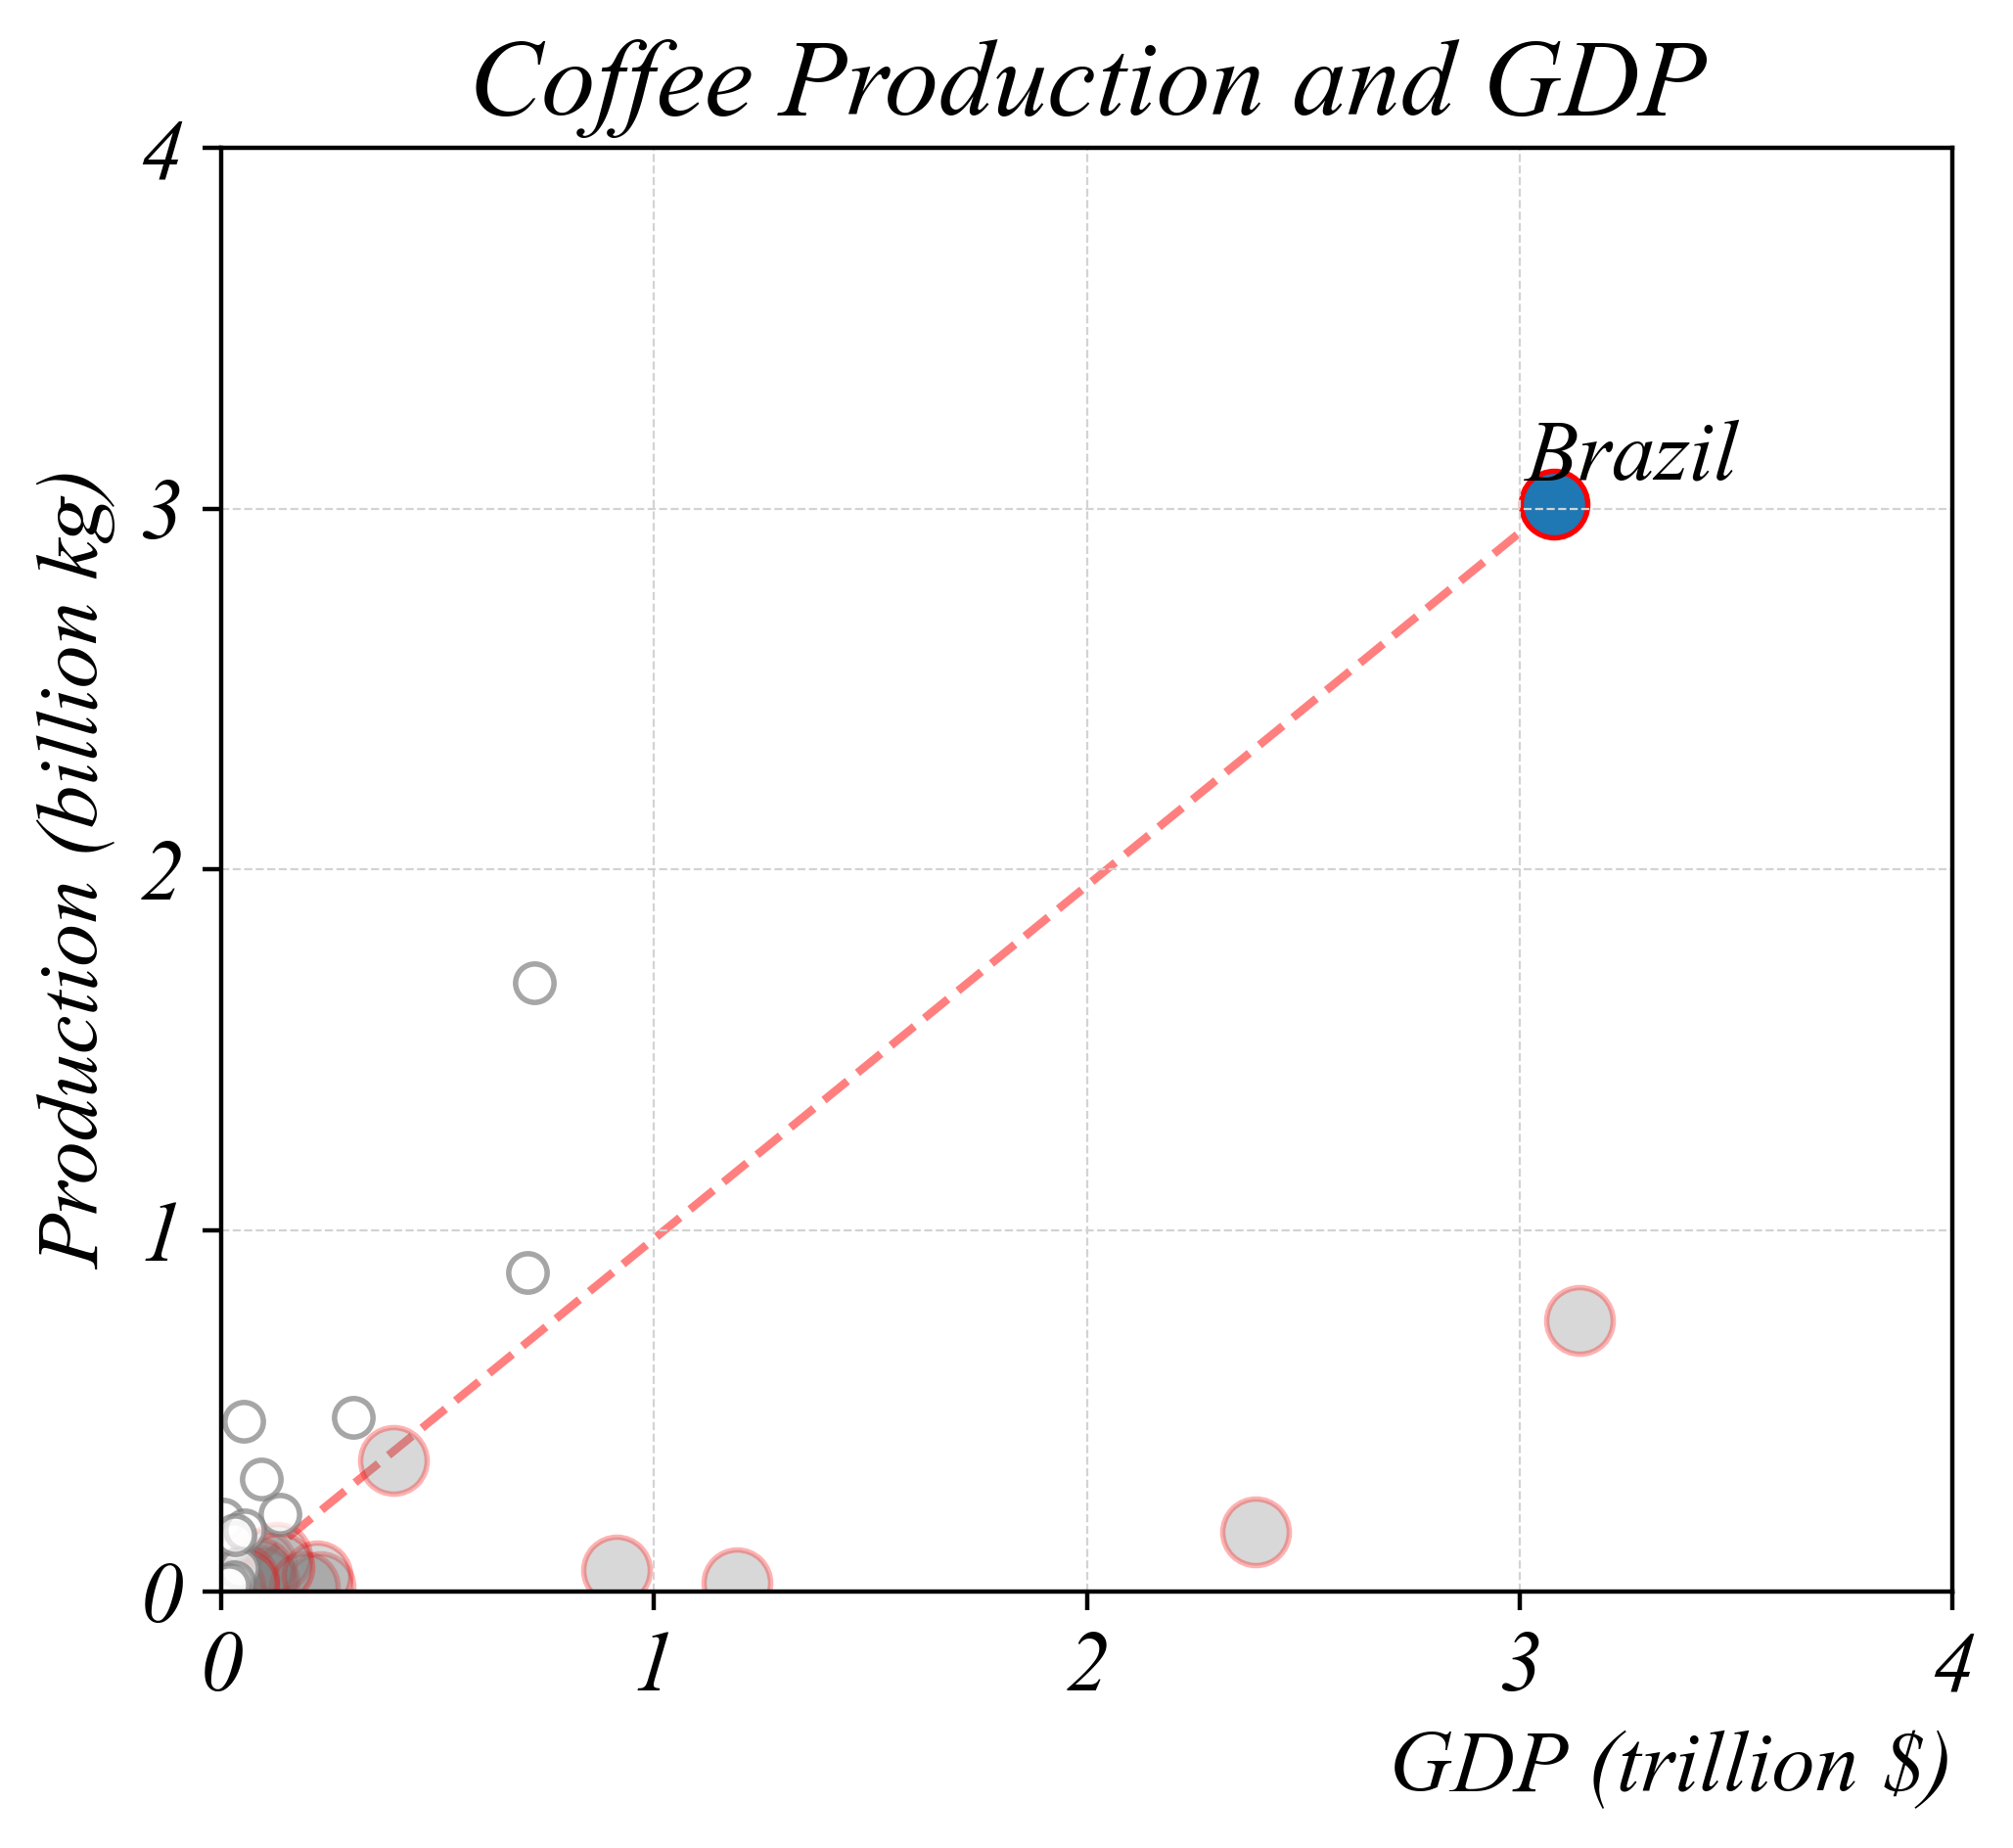

In [8]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['brazil_ratio'] = data['GDP']/data['coffe_prod']

brazil = data[data.coffe_prod == data.coffe_prod.max()]
brazil_gdp = brazil.GDP.values[0]
brazil_tonnes = brazil.coffe_prod.values[0]

greater = data[data['brazil_ratio'] > brazil_gdp/brazil_tonnes]
lower = data[data['brazil_ratio'] < brazil_gdp/brazil_tonnes]

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(brazil, x='GDP', y='coffe_prod', edgecolors='red', alpha=1, s=150)
plt.scatter(greater['GDP'], greater['coffe_prod'], color='grey', edgecolors='red', alpha=0.3, s=150)
plt.scatter(lower['GDP'], lower['coffe_prod'], color='white', edgecolors='grey', alpha=0.7, s=50)

# Annotation
plt.annotate('Brazil',(brazil.coffe_prod.values[0], brazil.GDP.values[0]))
plt.plot([0,brazil.GDP.values[0]],[0,brazil.coffe_prod.values[0]], linestyle='--', color='red', zorder=-1, alpha=0.5)

# Styling
plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks(ticks)
plt.xlim(0,4)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_06.png')

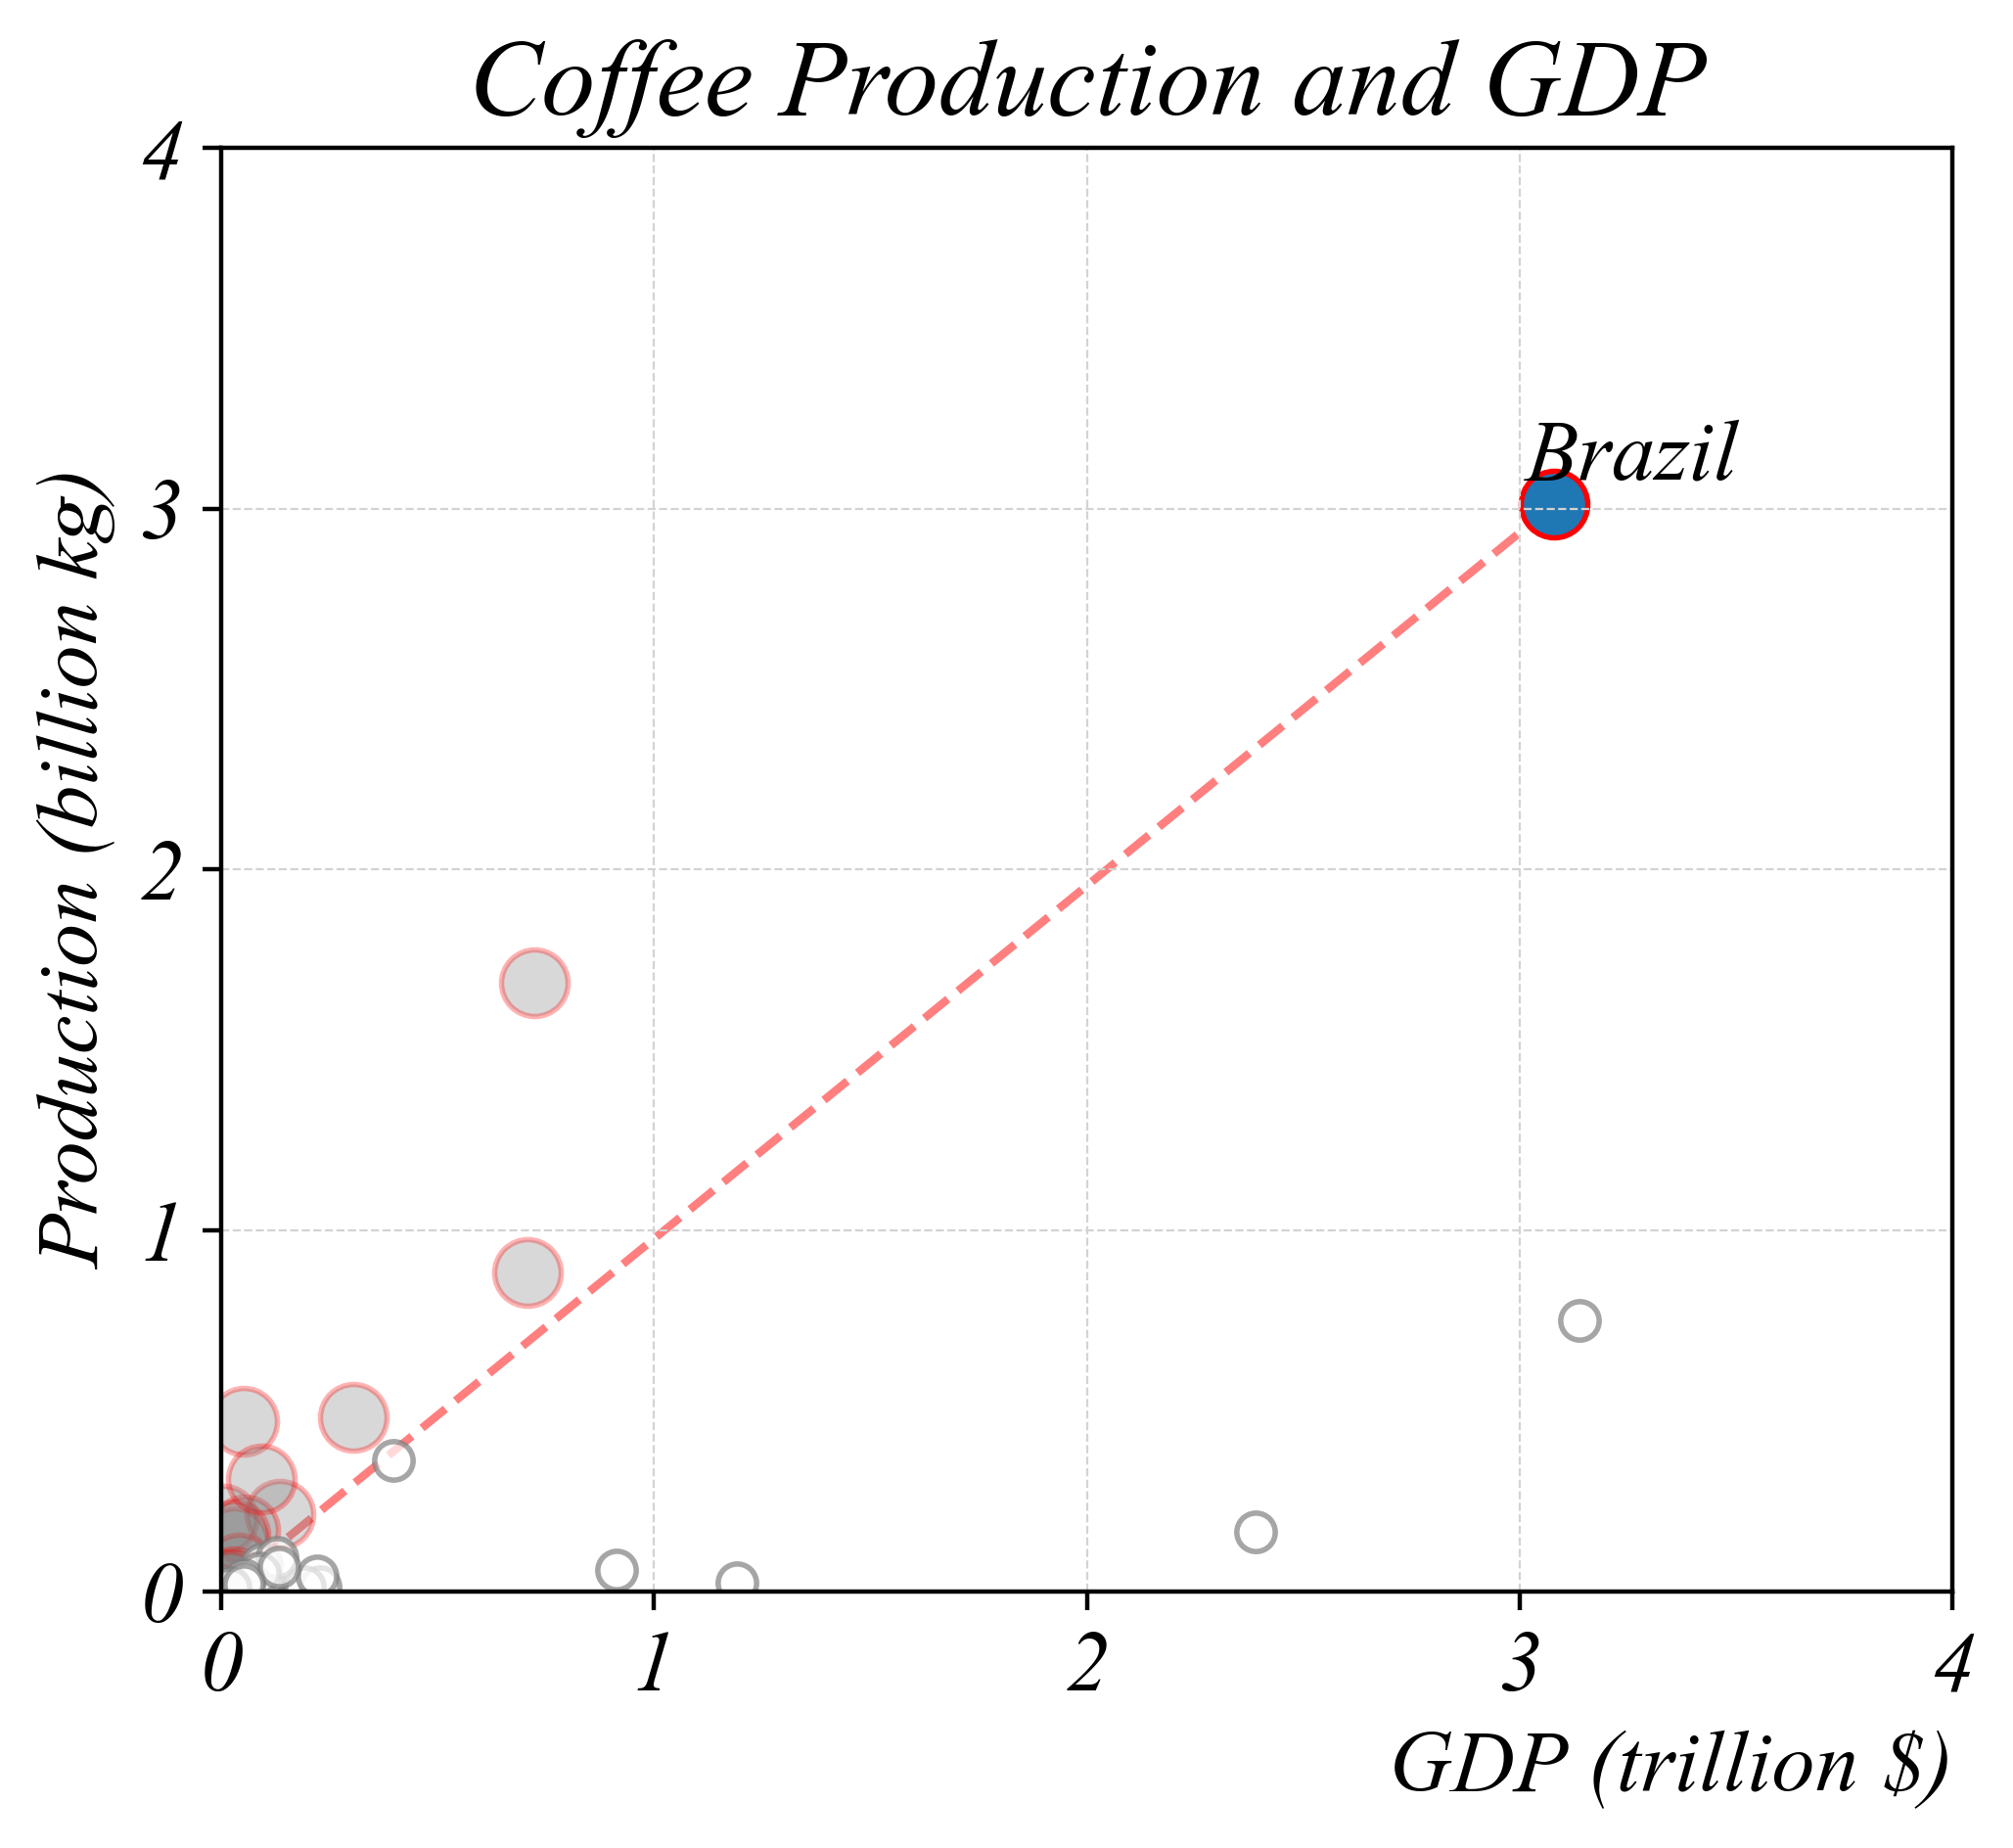

In [9]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['brazil_ratio'] = data['GDP']/data['coffe_prod']

brazil = data[data.coffe_prod == data.coffe_prod.max()]
brazil_gdp = brazil.GDP.values[0]
brazil_tonnes = brazil.coffe_prod.values[0]

greater = data[data['brazil_ratio'] > brazil_gdp/brazil_tonnes]
lower = data[data['brazil_ratio'] < brazil_gdp/brazil_tonnes]

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(brazil, x='GDP', y='coffe_prod', edgecolors='red', alpha=1, s=150)
plt.scatter(lower['GDP'], lower['coffe_prod'], color='grey', edgecolors='red', alpha=0.3, s=150)
plt.scatter(greater['GDP'], greater['coffe_prod'], color='white', edgecolors='grey', alpha=0.7, s=50)

# Annotation
plt.annotate('Brazil',(brazil.coffe_prod.values[0], brazil.GDP.values[0]))
plt.plot([0,brazil.GDP.values[0]],[0,brazil.coffe_prod.values[0]], linestyle='--', color='red', zorder=-1, alpha=0.5)

# Styling
plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks(ticks)
plt.xlim(0,4)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_07.png')

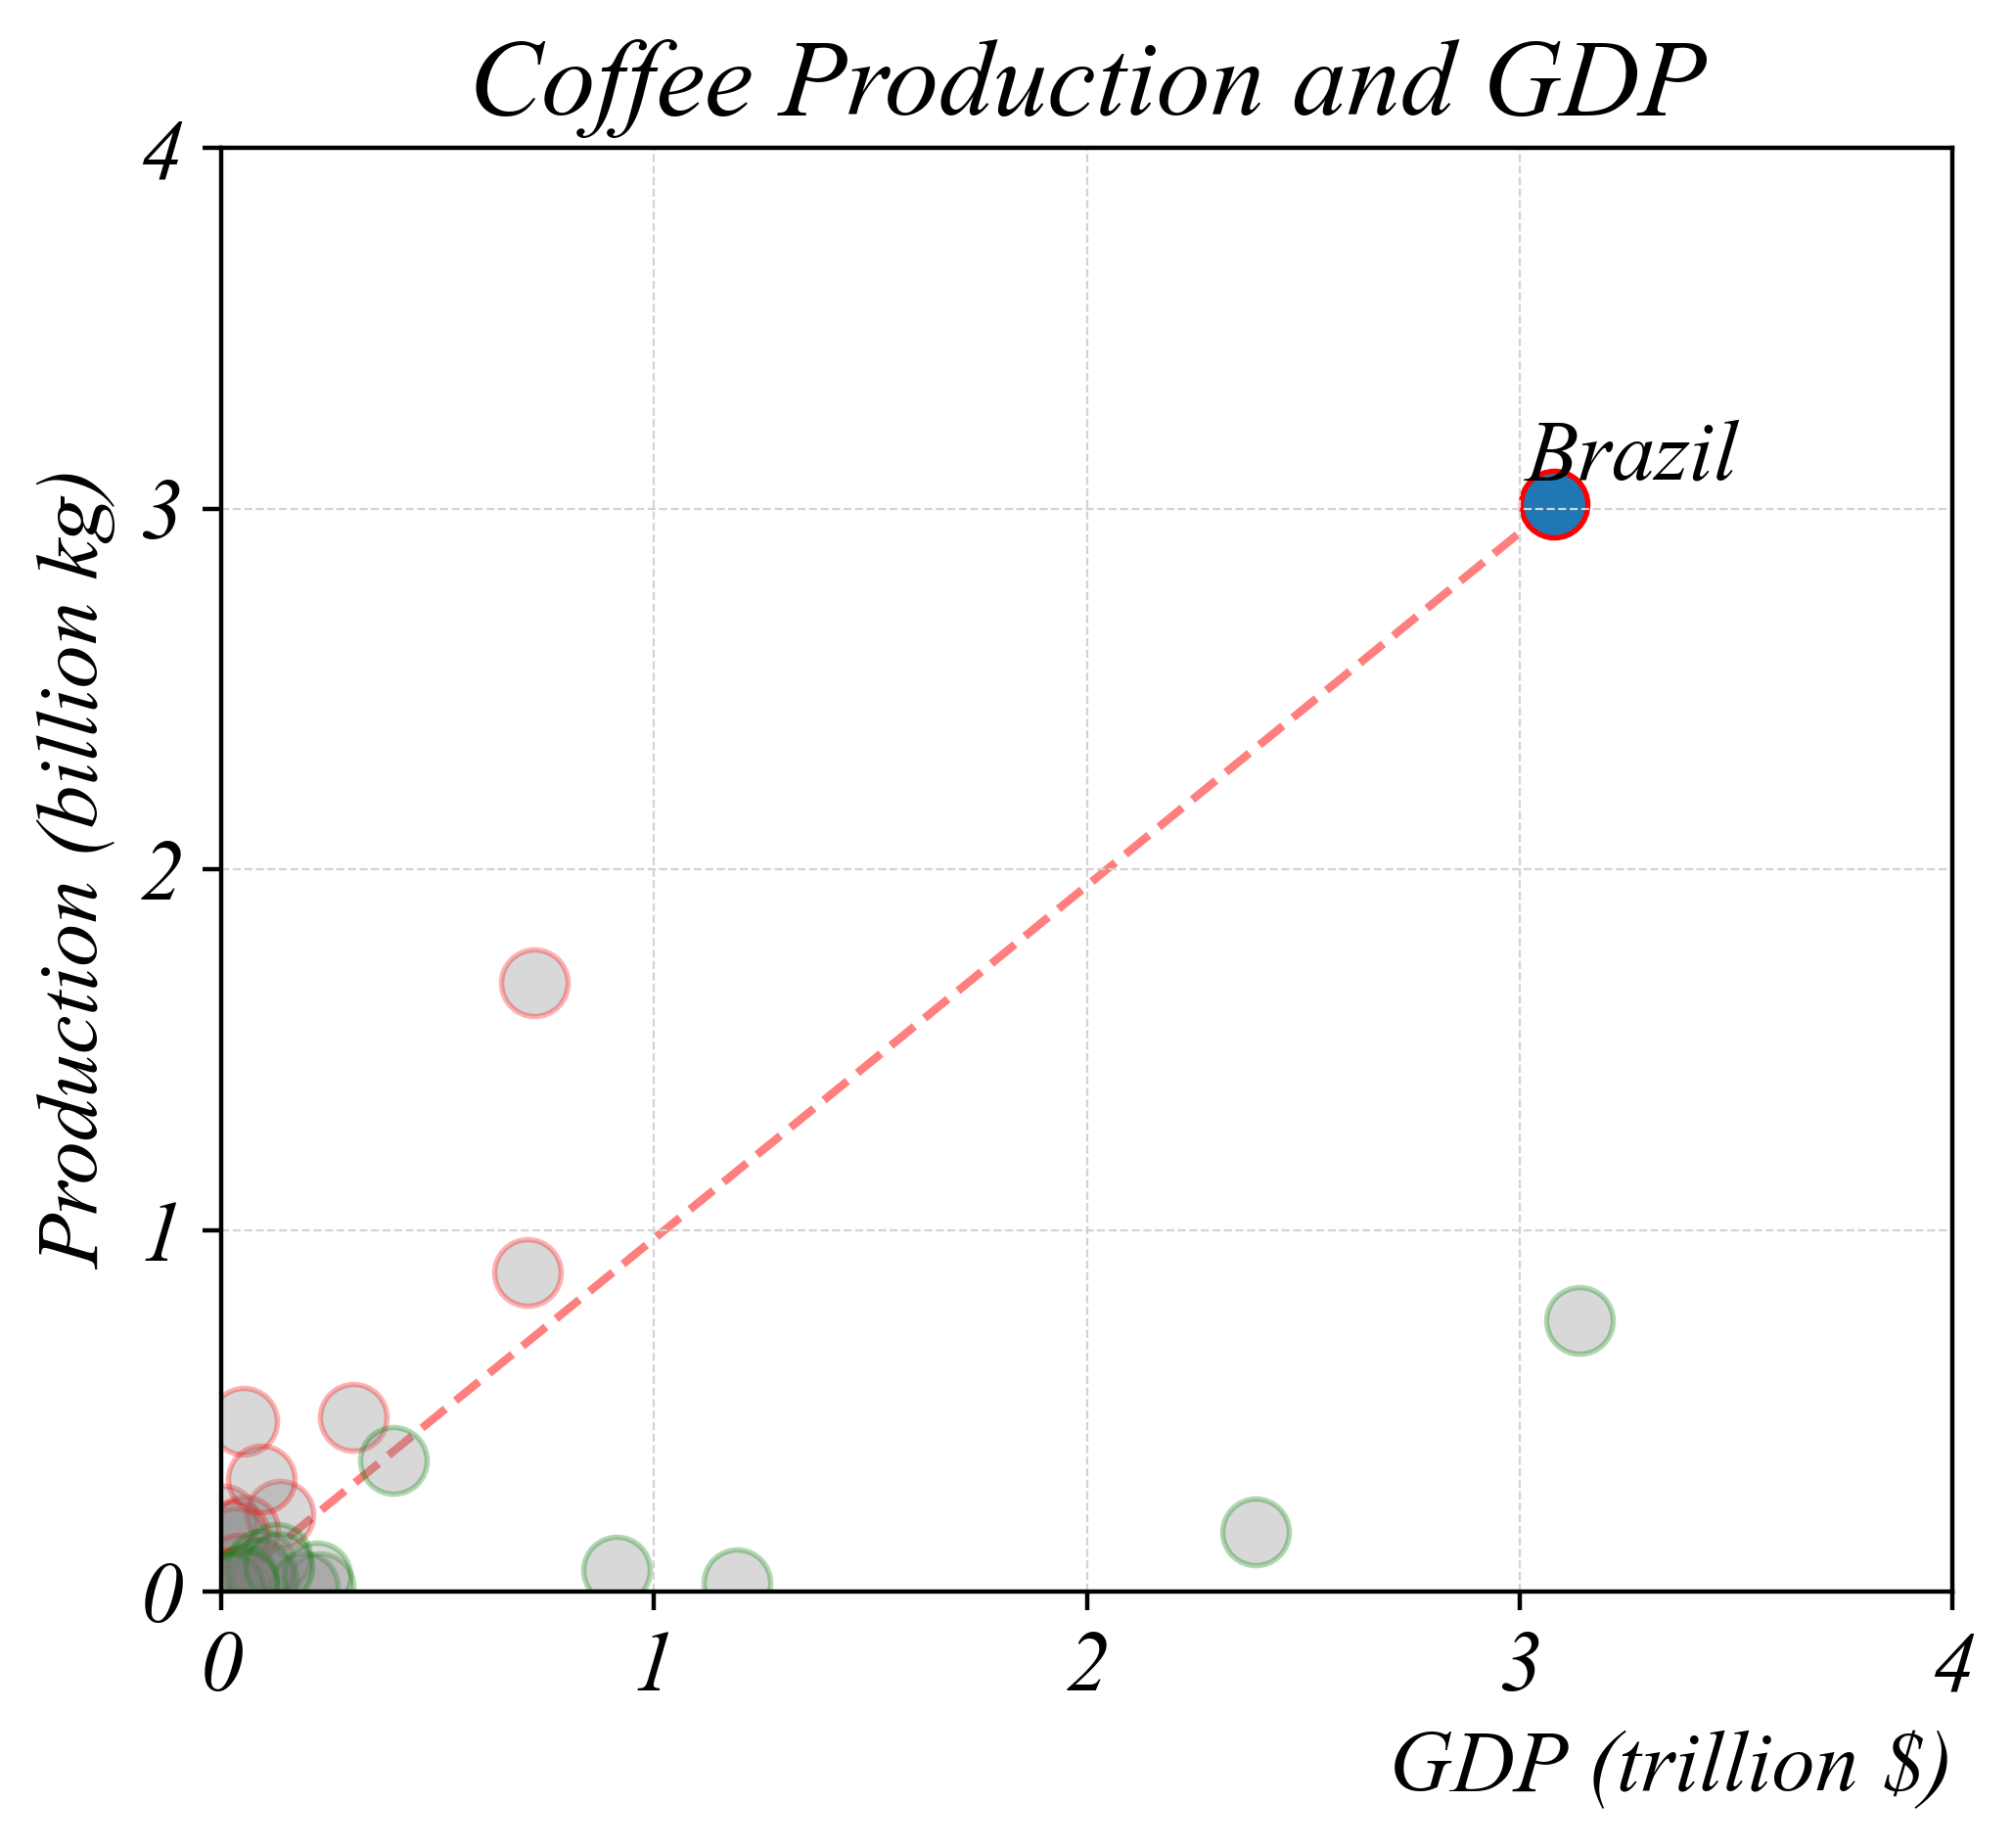

In [13]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['brazil_ratio'] = data['GDP']/data['coffe_prod']

brazil = data[data.coffe_prod == data.coffe_prod.max()]
brazil_gdp = brazil.GDP.values[0]
brazil_tonnes = brazil.coffe_prod.values[0]

greater = data[data['brazil_ratio'] > brazil_gdp/brazil_tonnes]
lower = data[data['brazil_ratio'] < brazil_gdp/brazil_tonnes]

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(brazil, x='GDP', y='coffe_prod', edgecolors='red', alpha=1, s=150)
plt.scatter(lower['GDP'], lower['coffe_prod'], color='grey', edgecolors='red', alpha=0.3, s=150)
plt.scatter(greater['GDP'], greater['coffe_prod'], color='grey', edgecolors='green', alpha=0.3, s=150)

# Annotation
plt.annotate('Brazil',(brazil.coffe_prod.values[0], brazil.GDP.values[0]))
plt.plot([0,brazil.GDP.values[0]],[0,brazil.coffe_prod.values[0]], linestyle='--', color='red', zorder=-1, alpha=0.5)

# Styling
plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks(ticks)
plt.xlim(0,4)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_08.png')

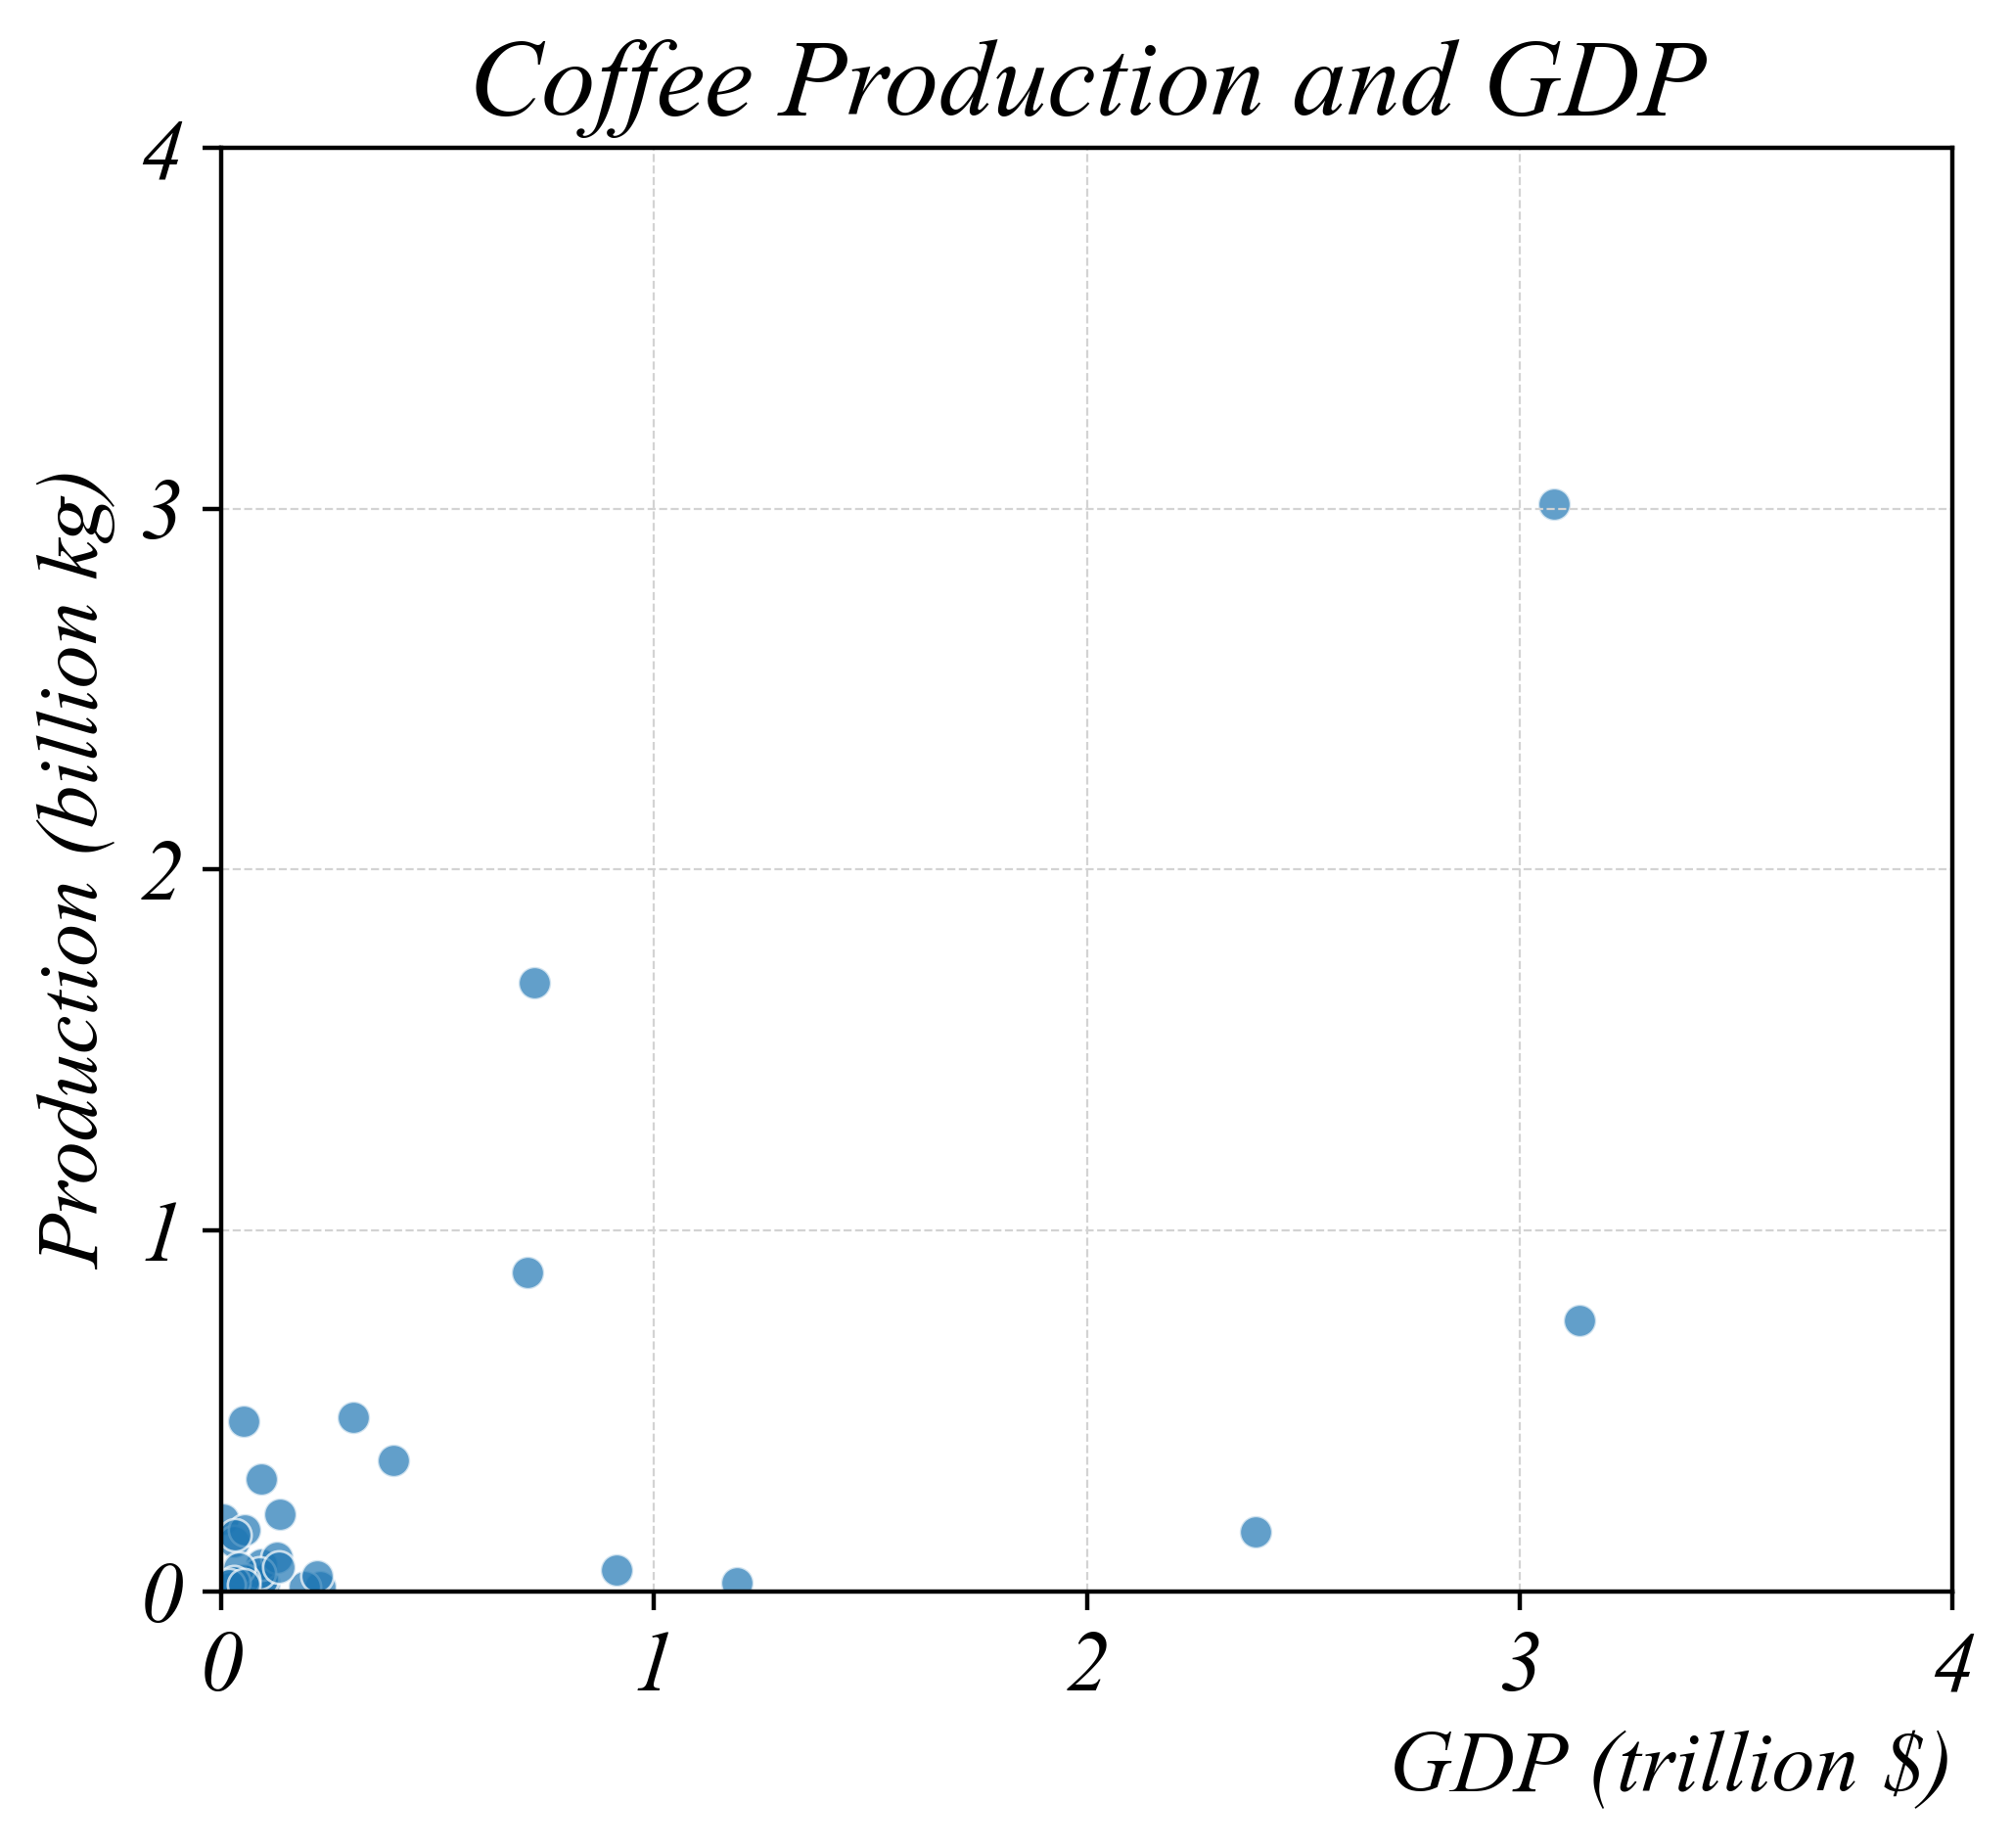

In [14]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(data, x='GDP', y='coffe_prod', alpha=0.7)

# Styling
plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks(ticks)
plt.xlim(0,4)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_09.png')

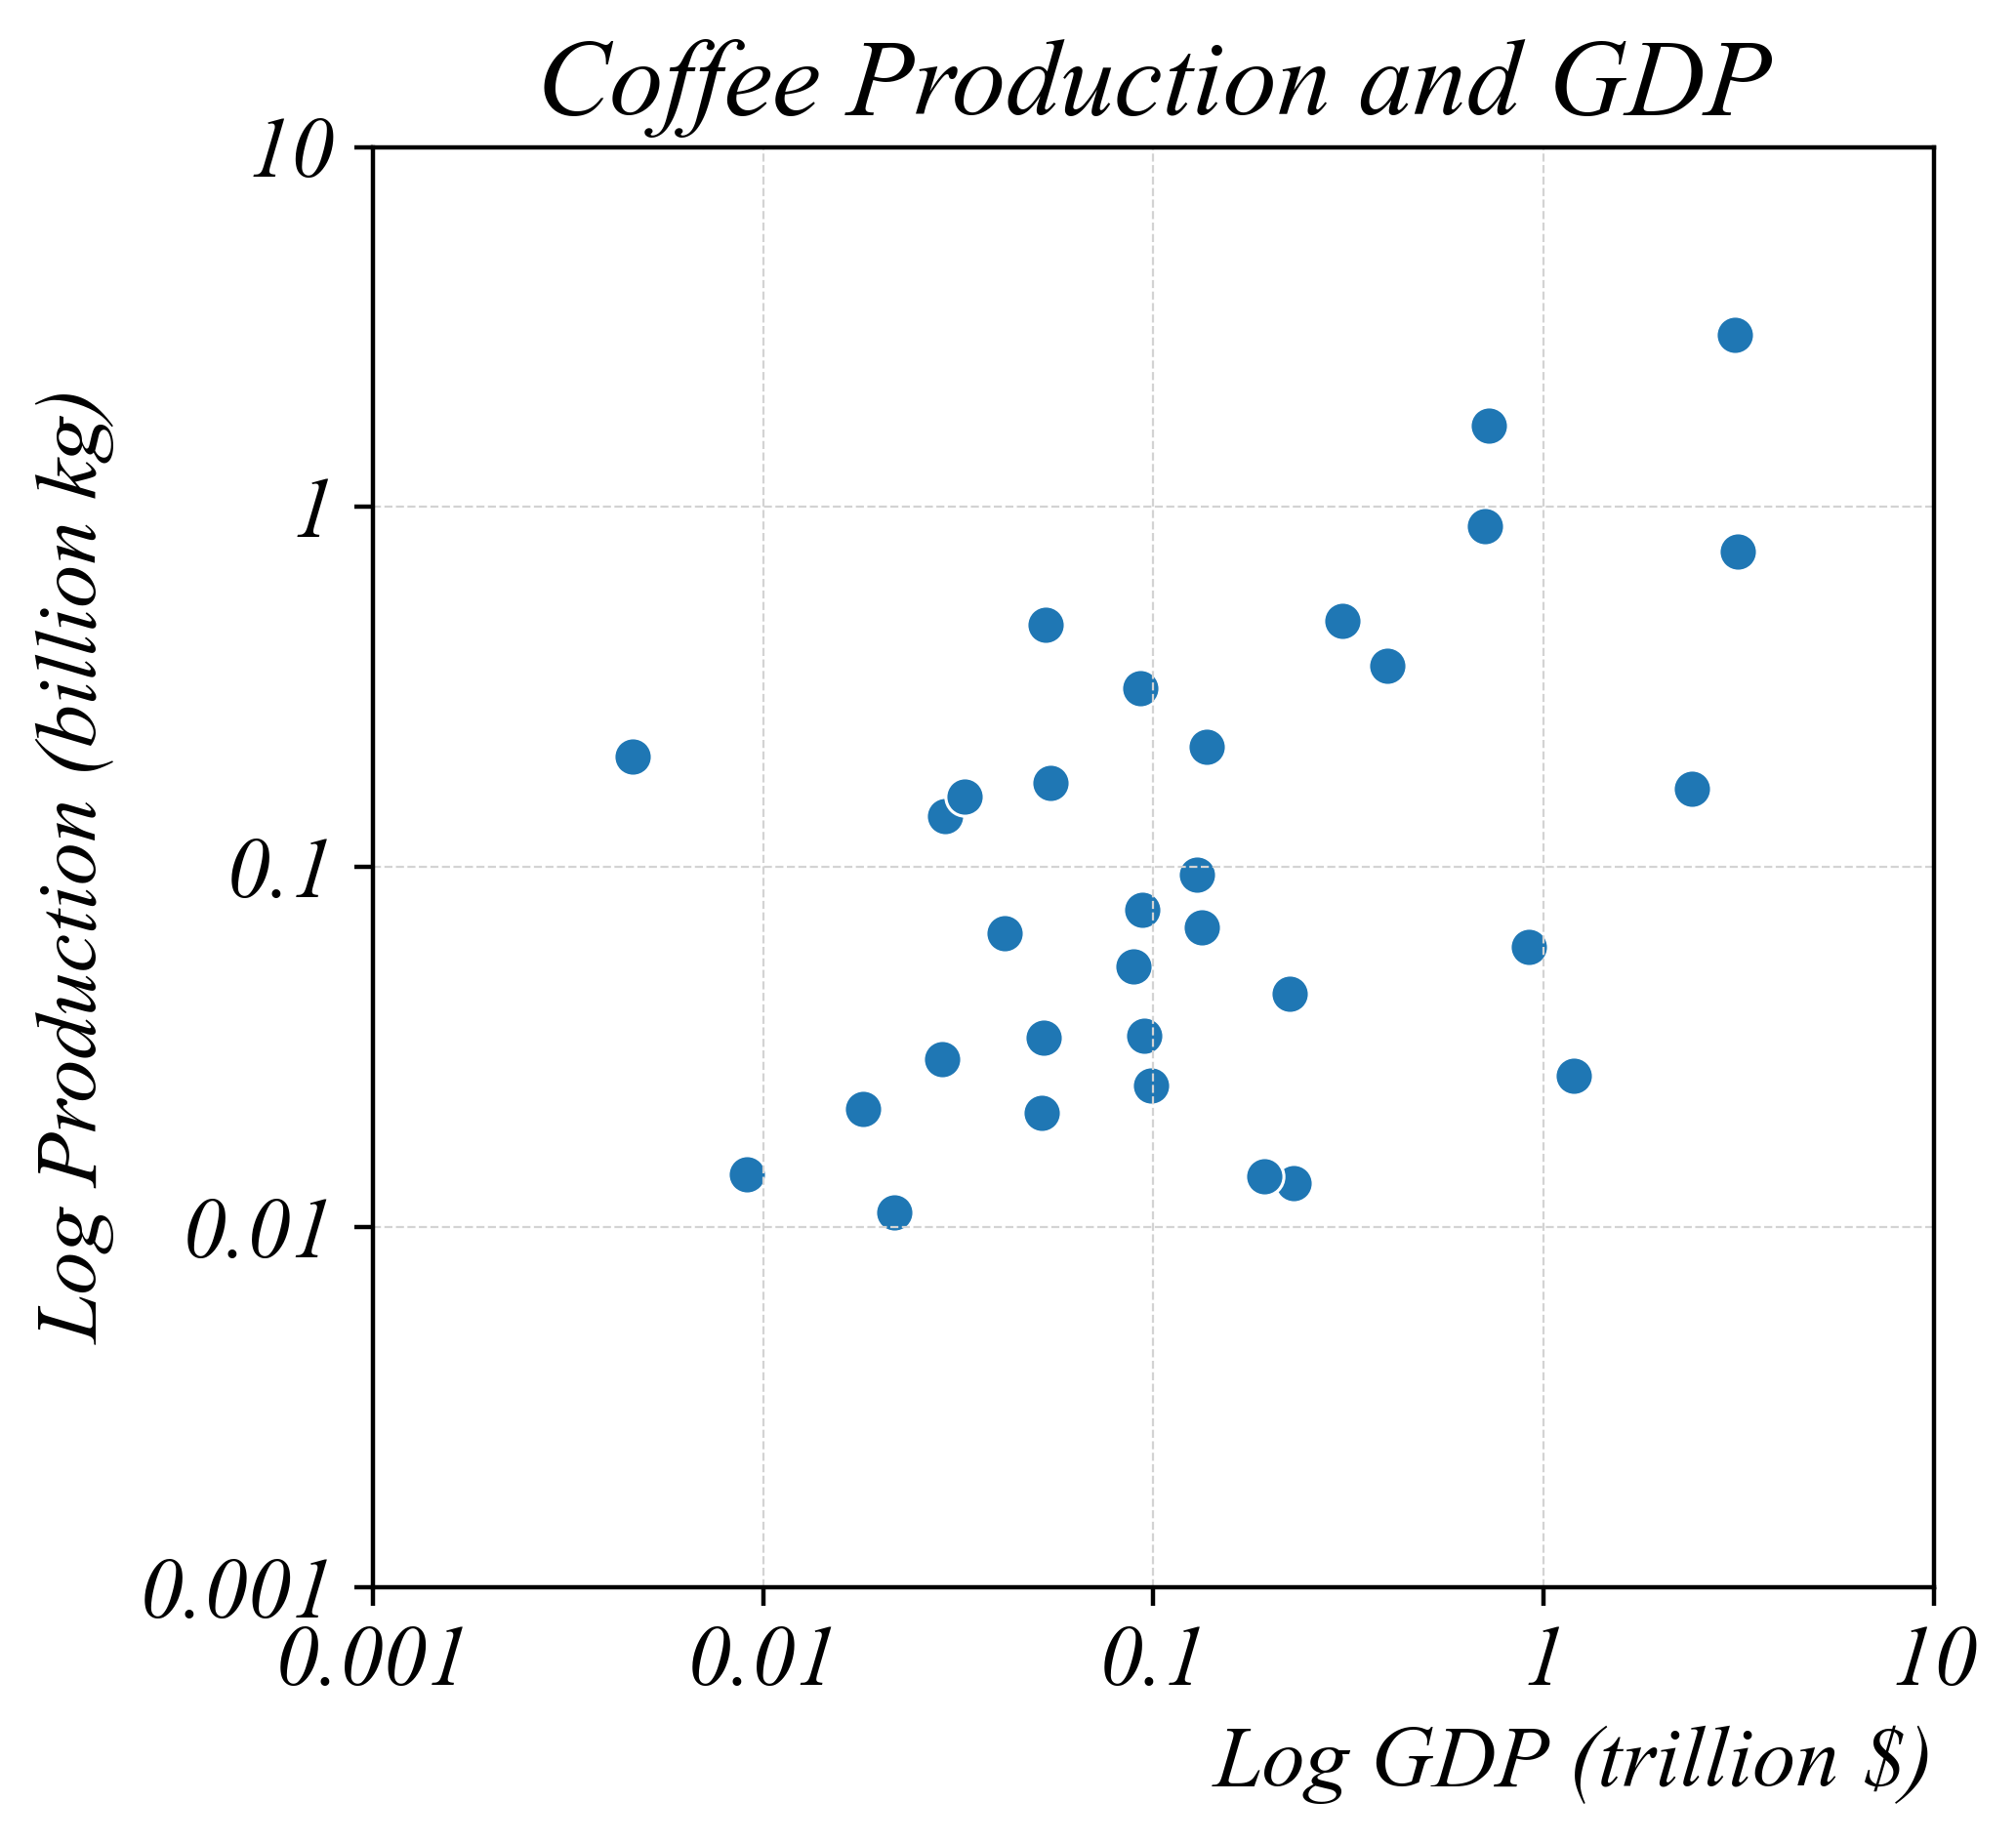

In [15]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['log10_GDP'] = np.log10(data['GDP'].replace(0, np.nan) + 1e-10)
data['log10_Tonnes'] = np.log10(data['coffe_prod'].replace(0, np.nan) + 1e-10)

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(data, x='log10_GDP', y='log10_Tonnes', color='C0', s=50)

# Styling
plt.xlabel('Log GDP (trillion $)', loc='right')
x_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
x_ticks = np.log10(x_ticks_labels)
plt.xticks(ticks=x_ticks, labels=x_ticks_labels)

plt.ylabel('Log Production (billion kg)')
y_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
y_ticks = np.log10(y_ticks_labels)
plt.yticks(ticks=y_ticks, labels=y_ticks_labels)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_10.png')

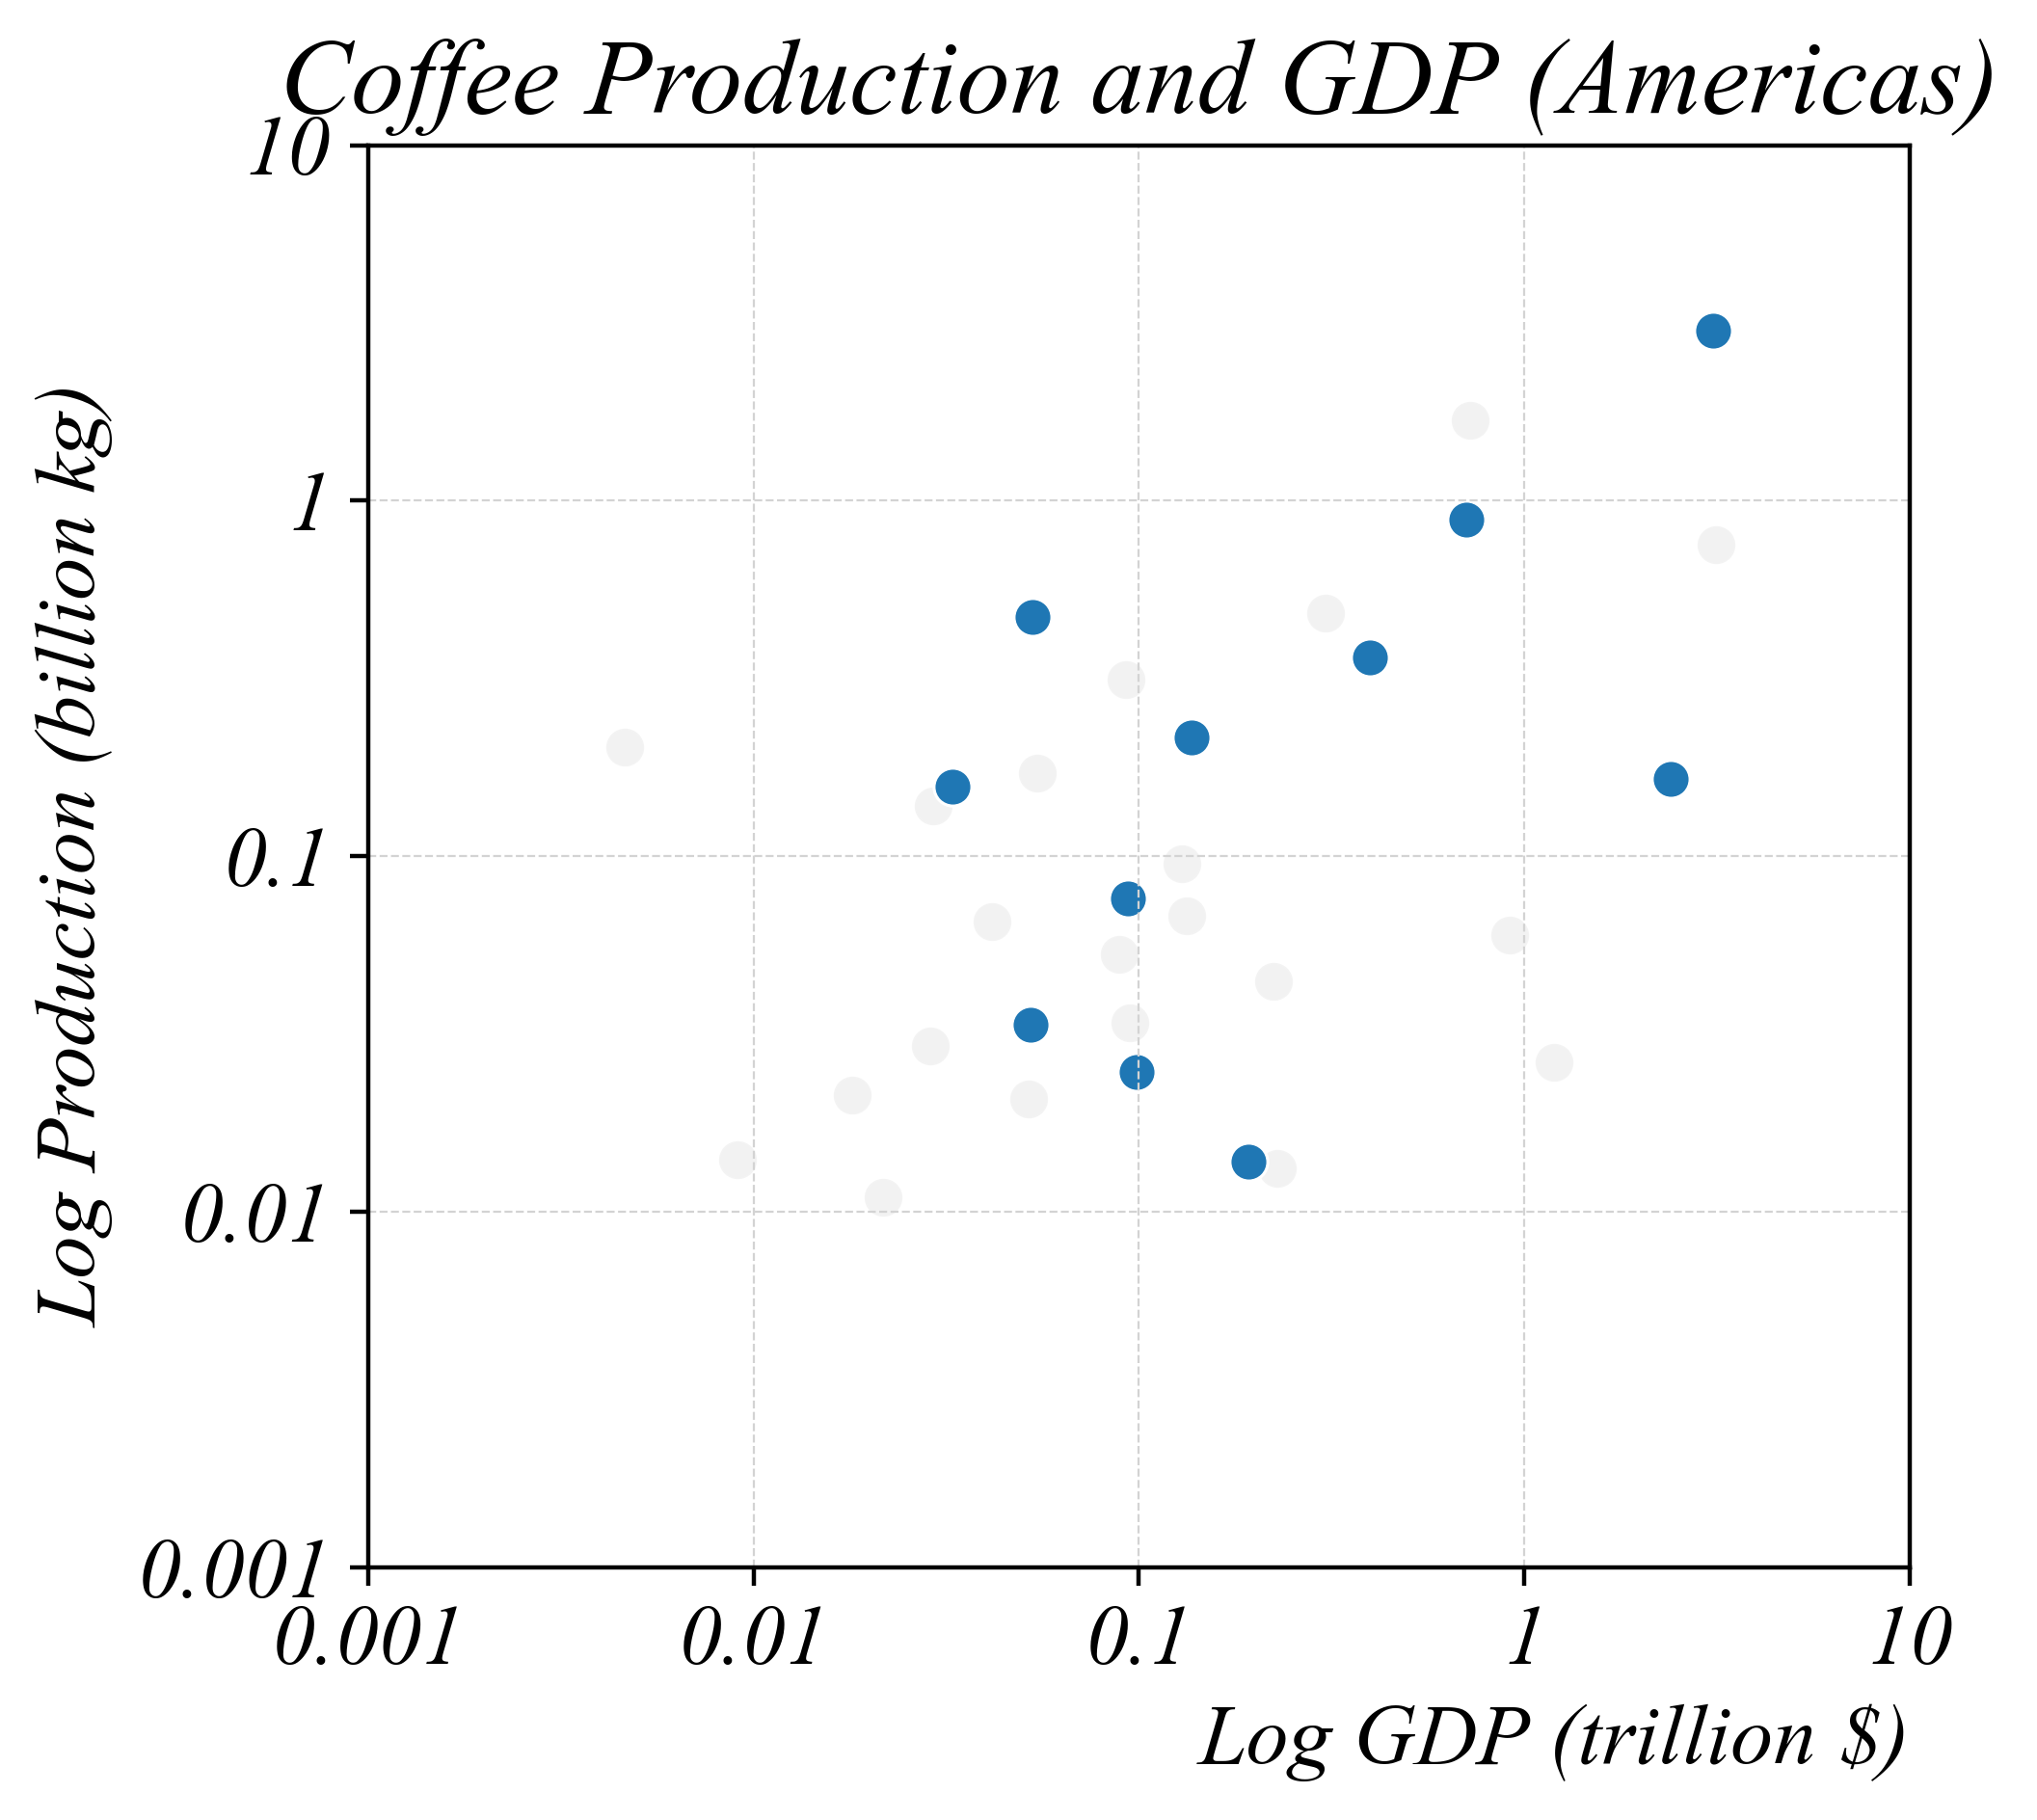

In [16]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['log10_GDP'] = np.log10(data['GDP'].replace(0, np.nan) + 1e-10)
data['log10_Tonnes'] = np.log10(data['coffe_prod'].replace(0, np.nan) + 1e-10)

americas = ['Bolivia', 'Brazil', 'Colombia', 'Costa Rica', 'Dominican Republic', 'El Salvador', 'Guatemala',
       'Honduras', 'Mexico', 'Nicaragua', 'Peru']
america_data = data[data.Entity.isin(americas)]

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(data, x='log10_GDP', y='log10_Tonnes', color='grey', alpha=0.1, s=50)
sns.scatterplot(america_data, x='log10_GDP', y='log10_Tonnes', color='C0', s=50)

# Styling
plt.xlabel('Log GDP (trillion $)', loc='right')
x_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
x_ticks = np.log10(x_ticks_labels)
plt.xticks(ticks=x_ticks, labels=x_ticks_labels)

plt.ylabel('Log Production (billion kg)')
y_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
y_ticks = np.log10(y_ticks_labels)
plt.yticks(ticks=y_ticks, labels=y_ticks_labels)
plt.title('Coffee Production and GDP (Americas)')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_11.png')

## Homework

In [18]:
prices = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
prices = prices.rename(columns={'price':'current_price'})
prices['previous_price'] = prices['current_price'].shift()
prices = prices.dropna()
prices.to_csv('data/Monthly_Coffee_Prices_Lag.csv')